https://nbviewer.jupyter.org/github/barbagroup/CFDPython/blob/master/lessons/01_Step_1.ipynb

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import time, sys

In [2]:
%matplotlib inline

# 1D

In [3]:
nx = 41 # size of space?
dx = 2/(nx-1)
nt = 25 # number of time steps
dt = 0.025 # time step size
c = 1 # speed of a wave
print(dt/dx) # needs to be less than 1, or equation explodes

u = velocity = np.ones(nx) # setting initial velocities
u[int(.5/dx):int(1/dx+1)] = 2
velocity[int(.5/dx):int(1/dx+1)] = 2
print()
print(u)

0.5

[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


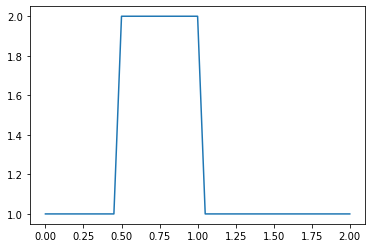

In [4]:
plt.plot(np.linspace(0,2,nx),u)

## Advection
Linear Convection constant wave speed
$$\frac{\partial u}{\partial t} + c * \frac{\partial u}{\partial x} = 0$$

Why do we need `un`? The variation without `un` seems to behave in essentially the same way, in the sense that it has the same profile, though it moves faster. Notably it does also spread out more, it's wider.

[1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.00000006 1.00000149
 1.00001794 1.00013858 1.00077194 1.00330538 1.01132792 1.03195733
 1.07579482 1.15372813 1.27062809 1.41940981 1.58058864 1.72935396
 1.84613329 1.92343324 1.9647373  1.97734416 1.9647373  1.92343324
 1.84613329 1.72935396 1.58058864 1.41940981 1.27062809 1.15372813
 1.07579482 1.03195733 1.01132792 1.00330538 1.00077194]


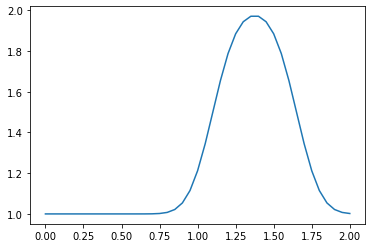

In [5]:
for n in range(nt):
    un=u.copy()
    
    for i in range(1,nx):
        u[i] -= c*dt/dx*(un[i] - un[i-1]) # require dt/dx to be less than 1
print(un)
plt.plot(np.linspace(0,2,nx),u)

[1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.00000001 1.00000023
 1.00000297 1.00002526 1.00015569 1.00074201 1.00284734 1.00904891
 1.02432173 1.05621157 1.11326751 1.20145271 1.31994035 1.45901811
 1.60216095 1.73165657 1.83455326 1.90543068 1.94477978 1.95470823
 1.93520069 1.88355965 1.7974879  1.67973885 1.54089066 1.39779158
 1.26818261 1.16470364 1.09172176 1.04617126 1.02097003]


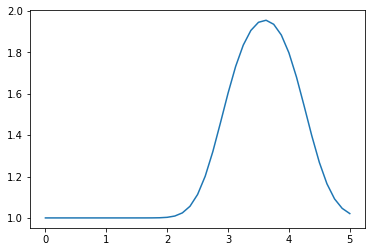

In [6]:
c = 0.1
for n in range(nt):    
    for i in range(1,nx):
        u[i] -= c*dt/dx*(u[i] - u[i-1]) # require dt/dx to be less than 1
print(u)
plt.plot(np.linspace(0,5,nx),u)

Nonlinear advection, non-constant wave speed
$$\frac{\partial u}{\partial t} + u \frac{\partial u}{\partial x} = 0$$

When this is expanded to higher dimensions, each component of u will be multiplied by the corresponding derivative. i.e. $u_x \frac{\partial}{\partial x}$. In 3d notation, it will look like $\vec{u}\cdotp\nabla$. This is the infamous advection term that causes so much nonlinearity. 

[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
[1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         2.         2.         2.         2.         2.
 1.99998005 1.96071146 1.55610765 1.15175525 1.02432354 1.00195312
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.        ]


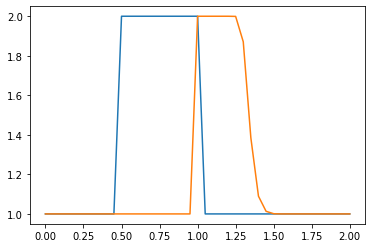

In [7]:
nx = 41
dx = 2 / (nx - 1)
nt = 10    #nt is the number of timesteps we want to calculate
dt = .025  #dt is the amount of time each timestep covers (delta t)

u = velocity = np.ones(nx) # setting initial velocities
u[int(.5/dx):int(1/dx+1)] = 2
velocity[int(.5/dx):int(1/dx+1)] = 2
print(u)
plt.plot(np.linspace(0,2,nx),u)

for n in range(nt):
    un=u.copy()
    for i in range(1,nx):
        u[i] -= un[i]*dt/dx*(un[i] - un[i-1]) # require dt/dx to be less than 1
print(un)
plt.plot(np.linspace(0,2,nx),u)

## Diffusion
du/dt = vd^2u/dx^2
$$\frac{\partial u}{\partial t} = \nu \frac{\partial^2 u}{\partial x^2}$$

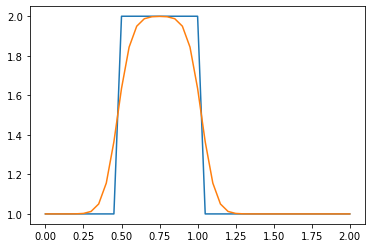

In [8]:
nx = 41
dx=2/(nx-1)
nt = 20
nu = 0.3
sigma = 0.2
dt = sigma*dx**2

u = velocity = np.ones(nx) # setting initial velocities
u[int(.5/dx):int(1/dx+1)] = 2
plt.plot(np.linspace(0,2,nx),u)


un=np.ones(nx)
for n in range(nt):
    un = u.copy()
    for i in range(1,nx-1):
        u[i] = un[i] + nu*dt/(dx)**2 * (un[i+1]-2*un[i] + un[i-1])

plt.plot(np.linspace(0,2,nx),u)

## Burgers' Equation
combining time progression with nonlinear convection and diffusion
$$\frac{\partial u}{\partial t} + u \frac{\partial u}{\partial x} = \nu\frac{\partial^2 u}{\partial x^2}$$

Here we can start to see the beginnings of Navier Stokes- we have the velocity derivative on the left, and have diffusion on the right. We will be adding in the terms for pressure, and external forces, and potentially additional extensions depending on how sophisticated we want to get.

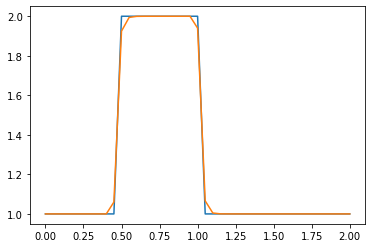

In [9]:
u = velocity = np.ones(nx) # setting initial velocities
u[int(.5/dx):int(1/dx+1)] = 2
plt.plot(np.linspace(0,2,nx),u)

un=np.ones(nx)
for n in range(nt):
    un = u.copy()
    for i in range(1,nx-1):
        un[i] += nu*dt/(dx)**2 * (un[i+1]-2*un[i] + un[i-1]) - un[i]*dt/dx*(un[i] - un[i-1])

plt.plot(np.linspace(0,2,nx),un)

In this section, we use sympy to create more sophisticated behavior, beginning with the starting conditions, and adding in periodic boundary conditions, so that it can keep running and won't go fully out of the plotting region.

In [10]:
import sympy as sp
from sympy import init_printing
init_printing(use_latex=True)

x, nu, t = sp.symbols("x nu t")
phi = (sp.exp(-(x-4 * t)**2 / (4 * nu * (t+1))) + 
       sp.exp(-(x-4 * t-2 * sp.pi)**2 / (4 * nu * (t+1))))

In [11]:
phiprime = phi.diff(x)

In [12]:
from sympy.utilities.lambdify import lambdify
u=-2 * nu * (phiprime / phi) + 4
ufunc = lambdify((t,x,nu), u)
print(ufunc(1,4,3))

3.49170664206445


make the boundaries periodic

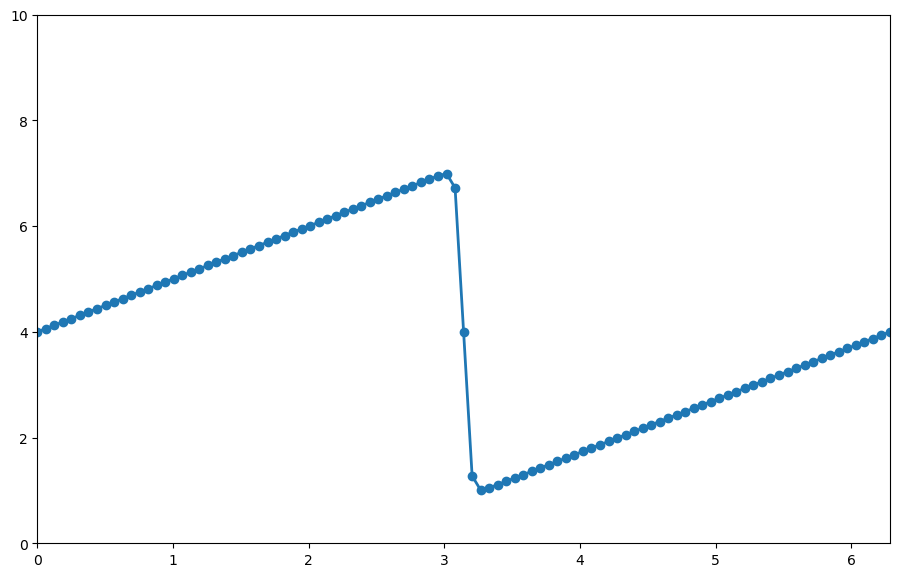

In [13]:
nx = 101
nt = 100
dx = 2 * np.pi / (nx-1)
nu = 0.07
dt = dx * nu

x = np.linspace(0, 2*np.pi, nx)
un = np.empty(nx)
t = 0

u_init = np.asarray([ufunc(t,x0,nu) for x0 in x])
u = u_init.copy()

plt.figure(figsize=(11,7), dpi=100)
plt.plot(x, u_init, marker="o", lw=2)
plt.xlim([0,2 * np.pi])
plt.ylim([0,10])
plt.show()

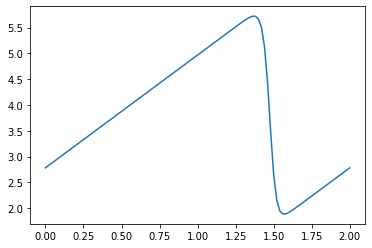

In [14]:
for n in range(nt):
    un = u.copy()
    for i in range(1, nx-1):
        # why does un not get updated?- un is the previous time iteration, this is updating spatially
        # second term is wave advection, third is the diffusion
        u[i] = un[i] - \
            un[i] * dt/dx * (un[i]-un[i-1]) + \
            nu * dt/(dx)**2 * (un[i+1] - 2*un[i] + un[i-1]) 
    
    # why are these -2? need to skip over -1 since that's being set equal to u[0]
    u[0] = un[0] - \
        un[0]*dt/dx*(un[0]-un[-2]) + \
        nu * dt/(dx)**2 * (un[1] - 2*un[0] + un[-2])
    u[-1] = u[0] # isn't this stepping back? maybe, but otherwise the last element doesn't get updated

plt.plot(np.linspace(0,2,nx),un)

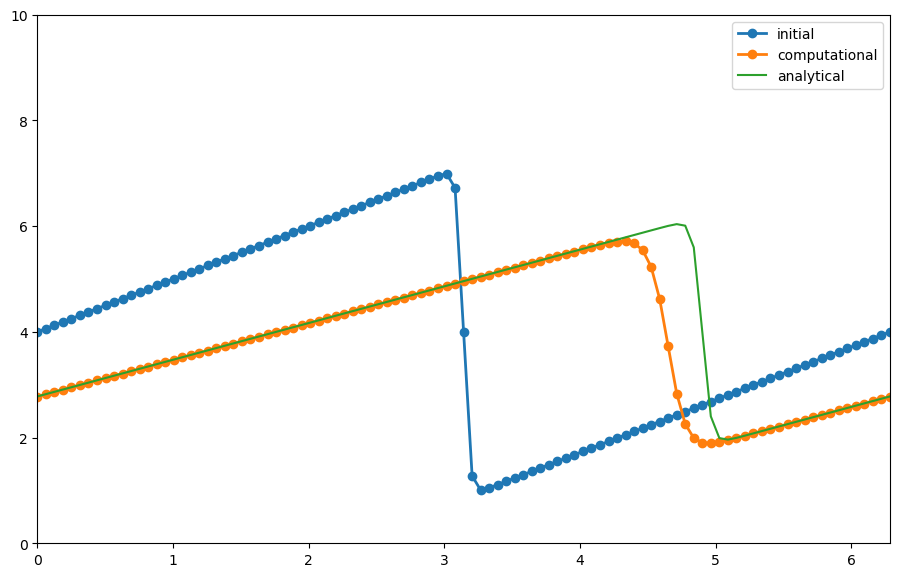

In [15]:
u_analytical = np.asarray([ufunc(nt * dt, xi, nu) for xi in x])

plt.figure(figsize = (11,7), dpi=100)
plt.plot(x, u_init, marker="o", lw=2, label="initial")
plt.plot(x, u, marker = "o", lw=2, label="computational")
plt.plot(x, u_analytical, label="analytical")

plt.xlim([0,2*np.pi])
plt.ylim([0,10])
plt.legend()

# 2D

In [16]:
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm

## Linear Convection
$$\frac{\partial u}{\partial t} + c\frac{\partial u}{\partial x} + c\frac{\partial u}{\partial y}= 0$$

0.025 0.20000000000000004 4.999999999999999


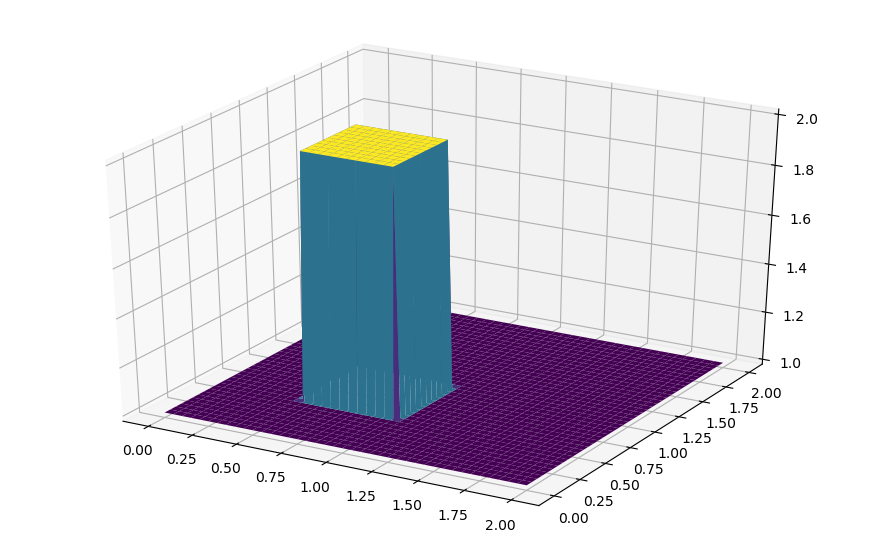

In [17]:
nx = 81
ny = 81
nt = 100
c = 1
dx = 2/(nx-1)
dy = 2/(ny-1)
sigma = .2 # what is this?
dt = sigma*dx
print(dx, dt/dx, dx/dt)

x = np.linspace(0,2, nx)
y = np.linspace(0,2, ny)
u = np.ones((nx, ny))
un = np.ones((nx, ny))

u[int(0.5/dy):int(1/dy+1), int(0.5/dx):int(1/dx+1)] = 2

fig = plt.figure(figsize=(11,7), dpi=100) # what are the 11, 7?
ax = fig.gca(projection="3d")
X,Y = np.meshgrid(x,y)
surf = ax.plot_surface(X, Y, u[:], cmap=cm.viridis)

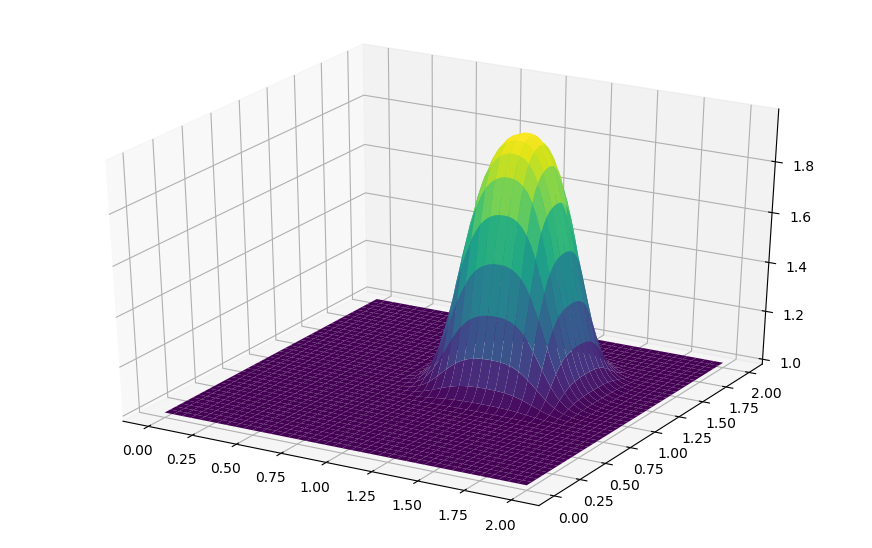

In [18]:
# with simple for loops. Can be made faster with matrix operations
u = np.ones((nx, ny))
u[int(0.5/dy):int(1/dy+1), int(0.5/dx):int(1/dx+1)] = 2

for n in range(nt + 1):
    un = u.copy()
    row, col = u.shape
    for i in range(nx):
        for j in range(ny):
            u[j,i] = un[j,i] - \
                c*dt/dx*(un[j,i] - un[j,i-1]) - \
                c*dt/dy*(un[j,i] - un[j-1,i])
            
            u[0,:]   = 1 # all boundaries are periodic without these
            u[-1, :] = 1
            u[:,0]   = 1
            u[:, -1] = 1

fig = plt.figure(figsize=(11,7), dpi=100)
ax=fig.gca(projection="3d")
surf2 = ax.plot_surface(X,Y, u[:], cmap=cm.viridis)

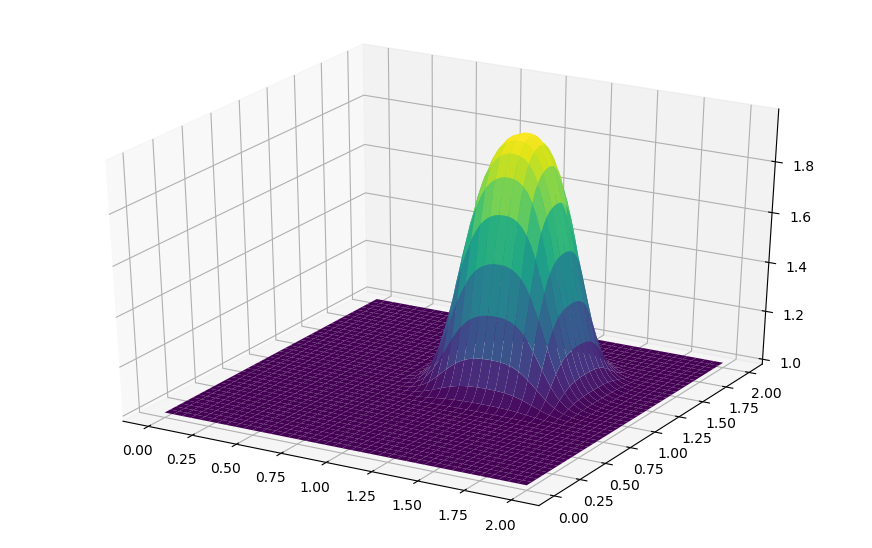

In [19]:
u = np.ones((nx, ny))
u[int(0.5/dy):int(1/dy+1), int(0.5/dx):int(1/dx+1)] = 2

for n in range(nt + 1):
    un=u.copy()
    u[1:,1:] = (un[1:, 1:] - \
                c*dt/dx*(un[1:,1:] - un[1:,:-1]) - \
                c*dt/dy*(un[1:,1:] - un[:-1, 1:]))
    
    u[0,:]   = 1 # sets edges to 1, doesn't seem to be critical
    u[-1, :] = 1
    u[:,0]   = 1
    u[:, -1] = 1

fig = plt.figure(figsize=(11,7), dpi=100)
ax=fig.gca(projection="3d")
surf2 = ax.plot_surface(X,Y, u[:], cmap=cm.viridis)

## Nonlinear convection
$$\frac{\partial \vec u}{\partial t} + \vec u \cdotp\frac{\partial \vec u}{\partial x} = 0$$
more explicitly written as:
$$\frac{\partial u}{\partial t} + u \cdotp\frac{\partial u}{\partial x} + v \cdotp\frac{\partial u}{\partial x} = 0$$
$$\frac{\partial v}{\partial t} + u \cdotp\frac{\partial v}{\partial x} + v \cdotp\frac{\partial v}{\partial x} = 0$$

In [20]:
nx = 101
ny = 101
nt = 80
c = 1
dx = 2/(nx-1)
dy=2/(ny-1)
sigma=0.2
dt = sigma*dx

x = np.linspace(0, 2, nx)
y = np.linspace(0, 2, ny)

u = np.ones((ny,nx))
v = np.ones((ny,nx))
un = np.ones((ny,nx))
vn = np.ones((ny,nx))

# hat function initial conditions
u[int(0.5/dy):int(1/dy+1), int(0.5/dx):int(1/dx+1)] = 2
v[int(0.5/dy):int(1/dy+1), int(0.5/dx):int(1/dx+1)] = 2

Text(0.5, 0, '$y$')

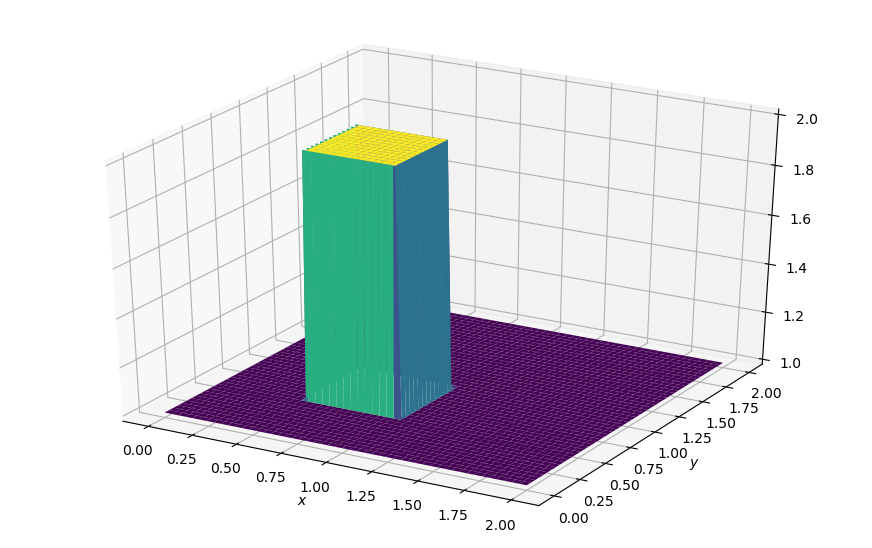

In [21]:
fig = plt.figure(figsize = (11,7), dpi=100)
ax = fig.gca(projection = "3d")
X, Y = np.meshgrid(x,y)

ax.plot_surface(X,Y, u, cmap=cm.viridis, rstride=2, cstride=2)
ax.set_xlabel("$x$")
ax.set_ylabel("$y$")

In [22]:
u = np.ones((nx, ny))
v = np.ones((ny,nx))
u[int(0.5/dy):int(1/dy+1), int(0.5/dx):int(1/dx+1)] = 2
v[int(0.5/dy):int(1/dy+1), int(0.5/dx):int(1/dx+1)] = 2

for n in range(nt + 1):
    un=u.copy()
    vn=v.copy()
    u[1:,1:] = un[1:,1:] - \
        un[1:,1:]*dt/dx*(un[1:,1:] - un[1:, :-1]) - \
        vn[1:,1:]*dt/dy*(un[1:,1:] - un[:-1, 1:])
    
    v[1:,1:] = vn[1:,1:] - \
        un[1:,1:]*dt/dx*(vn[1:,1:] - vn[1:, :-1]) - \
        vn[1:,1:]*dt/dy*(vn[1:,1:] - vn[:-1, 1:])

Text(0.5, 0, '$y$')

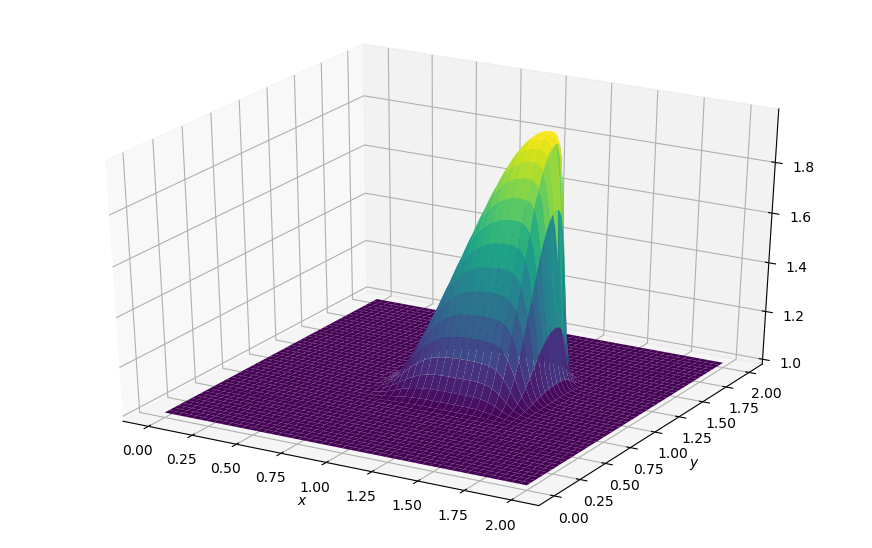

In [23]:
fig = plt.figure(figsize=(11,7), dpi=100)
ax=fig.gca(projection="3d")
X,Y = np.meshgrid(x,y)

ax.plot_surface(X,Y, u, cmap=cm.viridis, rstride=2, cstride=2)
ax.set_xlabel("$x$")
ax.set_ylabel("$y$")
#surf2 = ax.plot_surface(X,Y, u[:], cmap=cm.viridis)

Text(0.5, 0, '$y$')

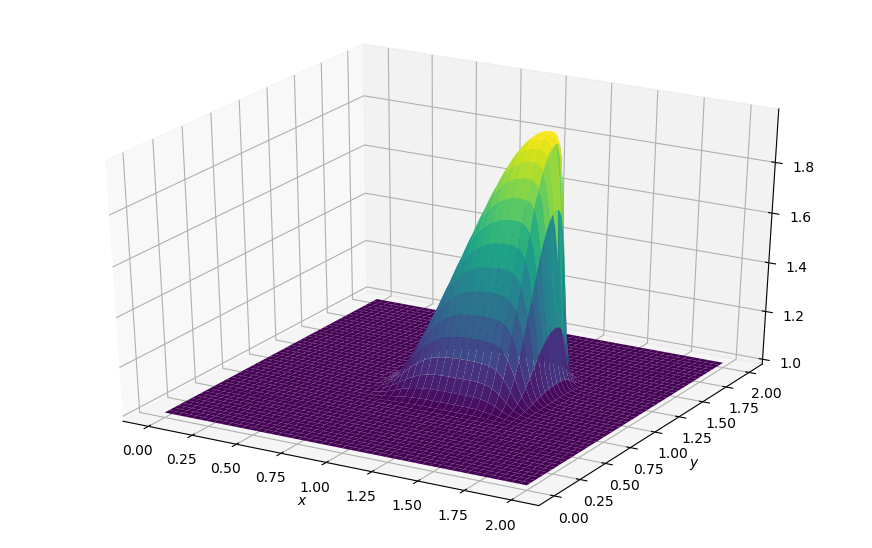

In [24]:
fig = plt.figure(figsize=(11,7), dpi=100)
ax=fig.gca(projection="3d")
X,Y = np.meshgrid(x,y)

ax.plot_surface(X,Y, v, cmap=cm.viridis, rstride=2, cstride=2)
ax.set_xlabel("$x$")
ax.set_ylabel("$y$")
#surf2 = ax.plot_surface(X,Y, u[:], cmap=cm.viridis)

## Diffusion
$$\frac{\partial \vec u}{\partial t} = \nu\frac{\partial^2 \vec u}{\partial x^2} + \nu\frac{\partial^2 \vec u}{\partial y^2}$$

$$\frac{\partial u}{\partial t} = \nu\frac{\partial^2 u}{\partial x^2} + \nu\frac{\partial^2 u}{\partial y^2}$$
$$\frac{\partial v}{\partial t} = \nu\frac{\partial^2 v}{\partial x^2} + \nu\frac{\partial^2 v}{\partial y^2}$$

In [25]:
nx = 31
ny = 31
nt = 17
nu = 0.5

dx = 2/(nx-1)
dy = 2/(ny-1)
sigma=0.25
dt = sigma*dx*dy/nu

x = np.linspace(0, 2, nx)
y = np.linspace(0, 2, ny)

u = np.ones((ny,nx))
un = np.ones((ny,nx))

# hat function initial conditions
u[int(0.5/dy):int(1/dy+1), int(0.5/dx):int(1/dx+1)] = 2

Text(0.5, 0, '$y$')

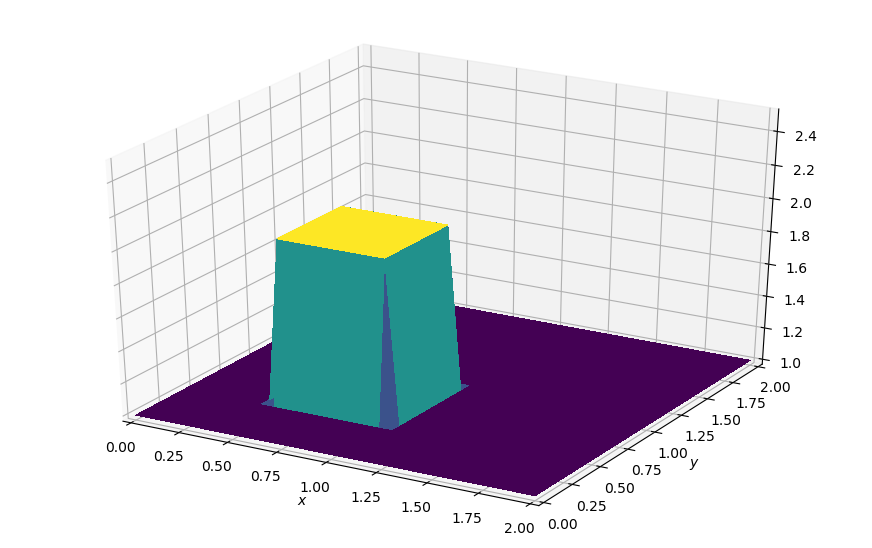

In [26]:
fig = plt.figure(figsize=(11,7), dpi=100)
ax = fig.gca(projection="3d")

X,Y = np.meshgrid(x,y)
surf = ax.plot_surface(X, Y, u, rstride=1, cstride=1, cmap=cm.viridis, linewidth=0, antialiased=False)

ax.set_xlim(0, 2)
ax.set_ylim(0, 2)
ax.set_zlim(1, 2.5)

ax.set_xlabel('$x$')
ax.set_ylabel('$y$')

Text(0.5, 0, '$y$')

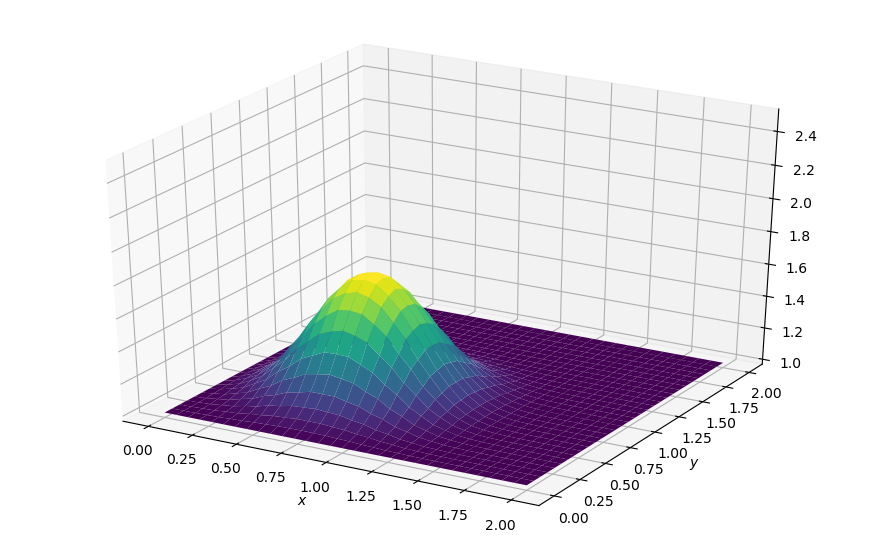

In [27]:
u = np.ones((nx, ny))
u[int(0.5/dy):int(1/dy+1), int(0.5/dx):int(1/dx+1)] = 2

for n in range(nt + 1):
    un=u.copy()
    u[1:-1, 1:-1] = un[1:-1, 1:-1] + \
        nu*dt/(dx)**2 * (un[1:-1, 2:] - 2*un[1:-1, 1:-1] + un[1:-1, 0:-2]) + \
        nu*dt/(dy)**2 * (un[2:, 1:-1] - 2*un[1:-1, 1:-1] + un[0:-2, 1:-1])

fig = plt.figure(figsize=(11,7), dpi = 100)
ax = fig.gca(projection="3d")
surf = ax.plot_surface(X,Y, u[:], rstride=1, cstride=1, cmap = cm.viridis, linewidth=0, antialiased=True)
ax.set_zlim(1,2.5)
ax.set_xlabel("$x$")
ax.set_ylabel("$y$")


In [28]:
def diffuse(nt):
    u = np.ones((nx, ny))
    u[int(0.5/dy):int(1/dy+1), int(0.5/dx):int(1/dx+1)] = 2

    for n in range(nt + 1):
        un=u.copy()
        u[1:-1, 1:-1] = un[1:-1, 1:-1] + \
            nu*dt/(dx)**2 * (un[1:-1, 2:] - 2*un[1:-1, 1:-1] + un[1:-1, 0:-2]) + \
            nu*dt/(dy)**2 * (un[2:, 1:-1] - 2*un[1:-1, 1:-1] + un[0:-2, 1:-1])

    fig = plt.figure(figsize=(11,7), dpi = 100)
    ax = fig.gca(projection="3d")
    X,Y = np.meshgrid(x,y)
    surf = ax.plot_surface(X,Y, u[:], rstride=1, cstride=1, cmap = cm.viridis, linewidth=0, antialiased=True)
    ax.set_zlim(1,2.5)
    ax.set_xlabel("$x$")
    ax.set_ylabel("$y$")

## Burger's Equation
$$\frac{\partial \vec u}{\partial t} + \vec u \cdotp\nabla \vec u = \nu\nabla^2 \vec u$$

$$\frac{\partial u}{\partial t} + u \frac{\partial u}{\partial x} = \nu\frac{\partial^2 u}{\partial x^2} + \nu\frac{\partial^2 u}{\partial y^2}$$
$$\frac{\partial v}{\partial t} + v \frac{\partial v}{\partial x} = \nu\frac{\partial^2 v}{\partial x^2} + \nu\frac{\partial^2 v}{\partial y^2}$$

Text(0.5, 0, '$y$')

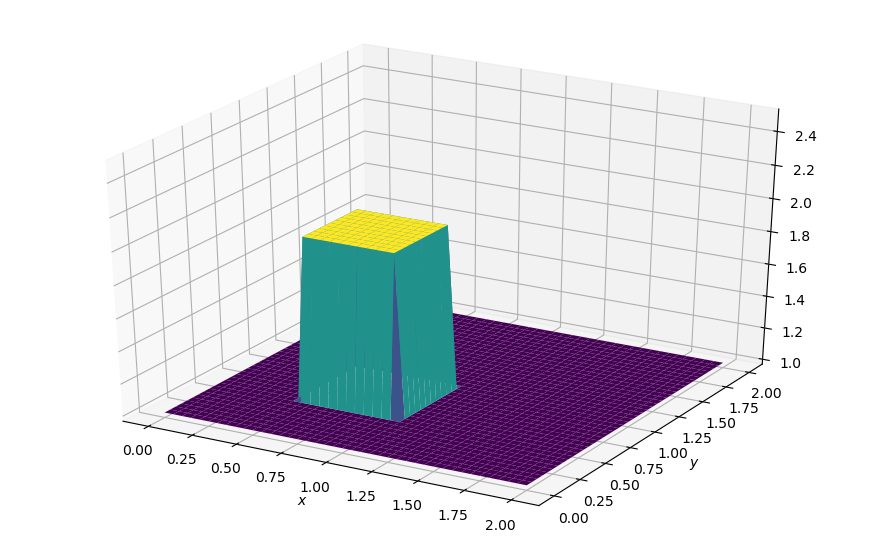

In [29]:
nx = 41
ny=41
nt=120
c=1
dx=2/(nx-1)
dy=2/(ny-1)
sigma=0.0009
nu=0.01
dt=sigma*dx*dy/nu

x=np.linspace(0,2,nx)
y=np.linspace(0,2,ny)
X,Y = np.meshgrid(x,y)

u=np.ones((nx, ny))
v=np.ones((nx, ny))
un=np.ones((nx, ny))
vn=np.ones((nx, ny))
comb=np.ones((nx, ny))

u[int(0.5/dy):int(1/dy+1), int(0.5/dx):int(1/dx+1)] = 2
v[int(0.5/dy):int(1/dy+1), int(0.5/dx):int(1/dx+1)] = 2

fig = plt.figure(figsize=(11,7), dpi = 100)
ax = fig.gca(projection="3d")
surf = ax.plot_surface(X,Y, u[:], rstride=1, cstride=1, cmap = cm.viridis, linewidth=0, antialiased=True)
ax.set_zlim(1,2.5)
ax.set_xlabel("$x$")
ax.set_ylabel("$y$")

Text(0.5, 0, '$y$')

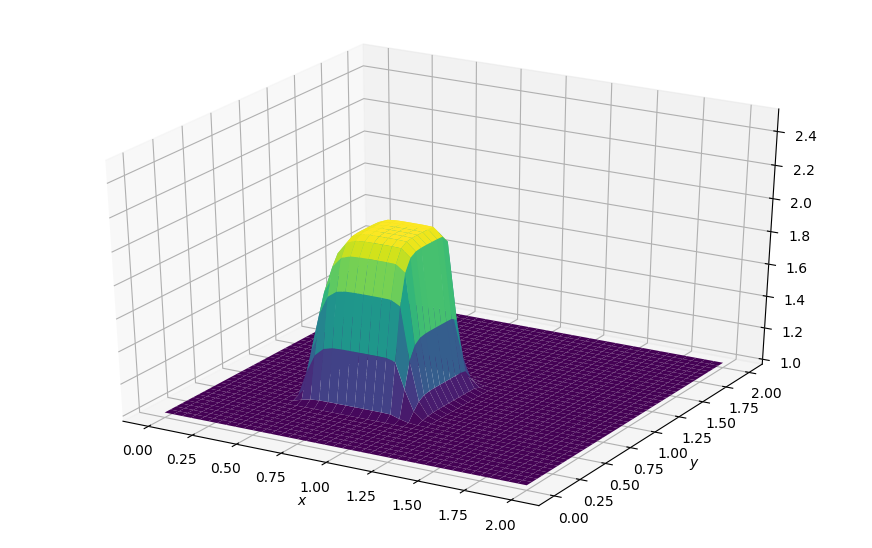

In [30]:
u = np.ones((nx, ny))
v = np.ones((ny,nx))
u[int(0.5/dy):int(1/dy+1), int(0.5/dx):int(1/dx+1)] = 2
v[int(0.5/dy):int(1/dy+1), int(0.5/dx):int(1/dx+1)] = 2

for n in range(nt + 1):
    un=u.copy()
    vn=v.copy()
    u[1:-1, 1:-1] = un[1:-1, 1:-1] + \
        nu*dt/(dx)**2 * (un[1:-1, 2:] - 2*un[1:-1, 1:-1] + un[1:-1, 0:-2]) + \
        nu*dt/(dy)**2 * (un[2:, 1:-1] - 2*un[1:-1, 1:-1] + un[0:-2, 1:-1]) - \
        un[1:-1,2:]*dt/dx*(un[1:-1,1:-1] - un[1:-1, 0:-2]) - \
        vn[2:,1:-1]*dt/dy*(un[1:-1,1:-1] - un[0:-2, 1:-1])
    
    v[1:-1, 1:-1] = vn[1:-1, 1:-1] + \
        nu*dt/(dx)**2 * (vn[1:-1, 2:] - 2*vn[1:-1, 1:-1] + vn[1:-1, 0:-2]) + \
        nu*dt/(dy)**2 * (vn[2:, 1:-1] - 2*vn[1:-1, 1:-1] + vn[0:-2, 1:-1]) - \
        un[1:-1,1:-1]*dt/dx*(vn[1:-1,1:-1] - vn[1:-1, 0:-2]) - \
        vn[1:-1,1:-1]*dt/dy*(vn[1:-1,1:-1] - vn[0:-2, 1:-1])

fig = plt.figure(figsize=(11,7), dpi = 100)
ax = fig.gca(projection="3d")
surf = ax.plot_surface(X,Y, u[:], rstride=1, cstride=1, cmap = cm.viridis, linewidth=0, antialiased=True)
ax.set_zlim(1,2.5)
ax.set_xlabel("$x$")
ax.set_ylabel("$y$")





## Laplace
$$\nabla^2 p = 0$$
$$\frac{\partial^2 p}{\partial x^2} + \frac{\partial^2 p}{\partial y^2} = 0$$

this solves for the steady state solution of pressure.
boundary conditions: 

x=0: p=0

x=2: p=y

y=0,1: $\frac{\partial p}{\partial y} = 0$

(analytical solution is $p(x,y) = x/4 - 4\sum_{n=1, odd}^{\infty}\frac{\sinh(n\pi x)\cos(n\pi y)}{(n\pi)^2 \sinh(2n\pi)}$

$$p_{i,j}^n = \frac{\Delta y^2 (p_{i+1,j}^n + p_{i-1,j}^n) + \Delta x^2 (p_{i,j+1}^n + p_{i,j-1}^n)}{2(\Delta x^2 + \Delta y^2)}$$


Text(0.5, 0, '$y$')

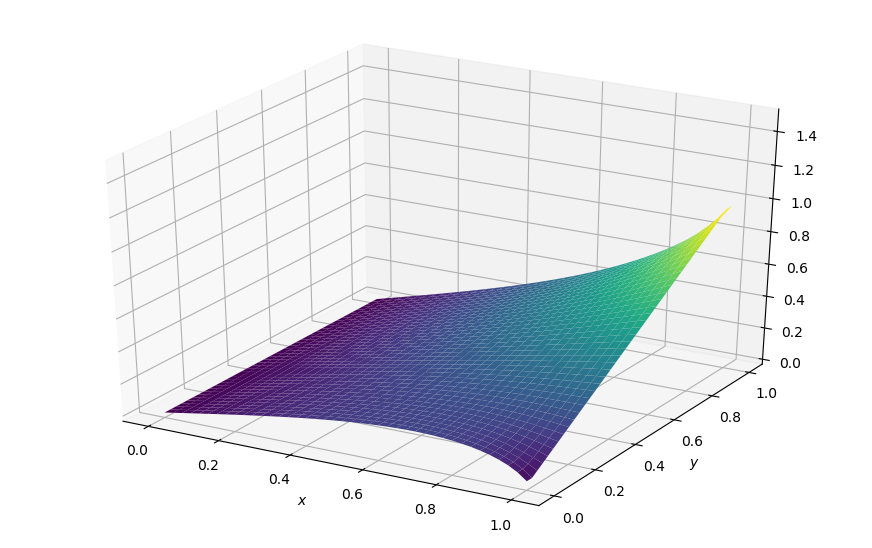

In [31]:
x = np.linspace(0,1, nx)
y = np.linspace(0,1, ny)

p = np.zeros((nx,ny))
p[:, 0] = 0  # p = 0 @ x = 0
p[:, -1] = y  # p = y @ x = 2
p[0, :] = p[1, :]  # dp/dy = 0 @ y = 0
p[-1, :] = p[-2, :]  # dp/dy = 0 @ y = 1

while True:
    pn = p.copy()
    
    p[1:-1, 1:-1] = (dy**2*(pn[1:-1, 2:] + \
                      pn[1:-1, 0:-2]) + \
                      dx**2*(pn[2:, 1:-1] + \
                      pn[0:-2, 1:-1]))/(2*(dx**2 + dy**2))
    
    p[:, 0] = 0
    p[:, -1] = y
    p[0, :] = p[1,:]
    p[-1, :] = p[-2,:]
    
    if abs(sum(sum(abs(p[:]) - abs(pn[:])))) < 0.01: break
        
fig = plt.figure(figsize=(11,7), dpi = 100)
ax = fig.gca(projection="3d")
X,Y = np.meshgrid(x,y)
surf = ax.plot_surface(X,Y, p[:], rstride=1, cstride=1, cmap = cm.viridis, linewidth=0, antialiased=True)
ax.set_zlim(0,1.5)
ax.set_xlabel("$x$")
ax.set_ylabel("$y$")

In [32]:
def lap2d_bryce(dx, dy, l1_target):
    x = np.linspace(0,2, nx)
    y = np.linspace(0,2, ny)

    p = np.zeros((nx,ny))
    l1_norm = 10

    while l1_norm > l1_target:
        pn = p.copy()

        p[1:-1, 1:-1] = (dy**2*(pn[1:-1, 2:] + \
                          pn[1:-1, 0:-2]) + \
                          dx**2*(pn[2:, 1:-1] + \
                          pn[0:-2, 1:-1]))/(2*(dx**2 + dy**2))

        p[:, 0] = 0
        p[:, -1] = y
        p[0, :] = p[1,:]
        p[-1, :] = p[-2,:]

        if abs(sum(sum(abs(p[:]) - abs(pn[:])))) < 0.01: break

    fig = plt.figure(figsize=(11,7), dpi = 100)
    ax = fig.gca(projection="3d")
    X,Y = np.meshgrid(x,y)
    surf = ax.plot_surface(X,Y, p[:], rstride=1, cstride=1, cmap = cm.viridis, linewidth=0, antialiased=True)
    ax.set_zlim(0,2.5)
    ax.set_xlabel("$x$")
    ax.set_ylabel("$y$")

In [33]:
def plot2D(x,y,p):
    fig = plt.figure(figsize = (11,7), dpi=100)
    ax = fig.gca(projection="3d")
    X,Y = np.meshgrid(x,y)
    surf=ax.plot_surface(X, Y, p[:], rstride = 1, cstride = 1, cmap=cm.viridis, linewidth=0, antialiased=False)
    
    ax.set_xlim(0,2)
    ax.set_ylim(0,1)
    ax.view_init(30,225)
    ax.set_xlabel("$x$")
    ax.set_ylabel("$y$")

In [34]:
def laplace2d(p,y,dx,dy,l1norm_target):
    l1norm=1

    while l1norm > l1norm_target:
        pn = p.copy()
        p[1:-1, 1:-1] = (dy**2*(pn[1:-1, 2:] + \
                          pn[1:-1, 0:-2]) + \
                          dx**2*(pn[2:, 1:-1] + \
                          pn[0:-2, 1:-1]))/(2*(dx**2 + dy**2))
        
        p[:, 0] = 0  # p = 0 @ x = 0
        p[:, -1] = y  # p = y @ x = 2
        p[0, :] = p[1, :]  # dp/dy = 0 @ y = 0
        p[-1, :] = p[-2, :]  # dp/dy = 0 @ y = 1
        l1norm = (np.sum(np.abs(p[:]) - np.abs(pn[:])) /
                np.sum(np.abs(pn[:])))
     
    return p

In [35]:
nx = 31
ny = 31
dx = 2/(nx-1)
dy = 2/(ny-1)

p = np.zeros((ny,nx))

x = np.linspace(0,2,nx)
y = np.linspace(0,1,ny)

p[:, 0] = 0  # p = 0 @ x = 0
p[:, -1] = y  # p = y @ x = 2
p[0, :] = p[1, :]  # dp/dy = 0 @ y = 0
p[-1, :] = p[-2, :]  # dp/dy = 0 @ y = 1

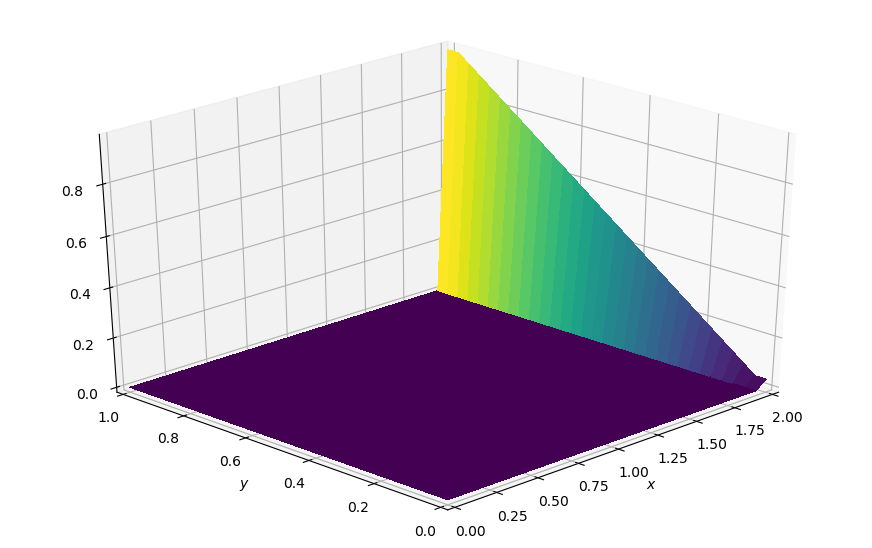

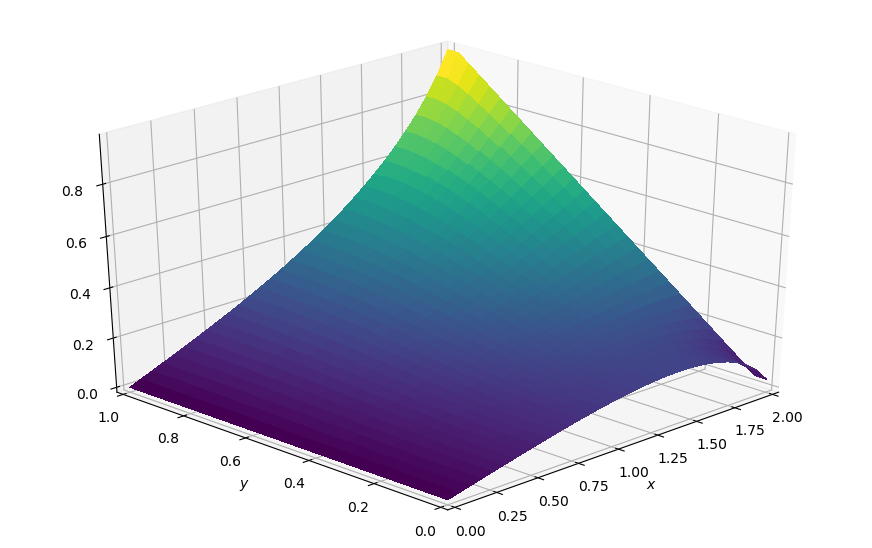

In [36]:
plot2D(x,y,p)
p = laplace2d(p,y,dx,dy,1e-4)
plot2D(x,y,p)

## Poisson
Assuming constant density, this represents the convservation of mass
$$\nabla\cdotp\vec v = 0$$

$$\frac{\partial \vec v}{\partial t} + \left(\vec v \cdotp\nabla\right)\vec v = \frac{-1}{\rho} + \nu\nabla^2\vec v$$
$v$ is the field that we are trying to find, but it is the only variable in the mass conservation equation, making it difficult to couple the two, and apply the constraint. However, we may be able to transform it into a pressure distribution which results in mass conservation. As far as I am aware, this particular pressure distribution isn't a solution, but just a demonstration of how we can create a pressure distribution as we desire. Note that b, the imposed pressure distribution is not usually dependent on time, it is a steady state pressure that imposes the incompressibility of the fluid.


$$\nabla^2 p = b$$
$$\frac{\partial^2 p}{\partial x^2} + \frac{\partial^2 p}{\partial y^2} = b$$

boundary conditions: 

x=0,2: p=0

y=0,1: p=0

i=1/4nx, j=1/4ny: $b_{i,j} = 100$

i=3/4nx, j=3/4ny: $b_{i,j} = -100$

$$p_{i,j}^n = \frac{\Delta y^2 (p_{i+1,j}^n + p_{i-1,j}^n) + \Delta x^2 (p_{i,j+1}^n + p_{i,j-1}^n) - b_{i,j}^{n}\Delta x^2\Delta y^2}{2(\Delta x^2 + \Delta y^2)}$$

In [37]:
nx = 50
ny=50
nt=100
xmin=0
xmax=2
ymin=0
ymax=1

dx=(xmax-xmin)/(nx-1)
dy=(ymax-ymin)/(ny-1)

p = np.zeros((ny,nx))
pd = np.zeros((ny,nx))
b = np.zeros((ny,nx))
x = np.linspace(xmin,xmax,nx)
y = np.linspace(ymin,ymax,ny)

b[int(ny/4), int(nx/4)] = 100
b[int(3*ny/4), int(3*nx/4)] = -100

In [38]:
for it in range(nt):
    pn = p.copy()
    
    p[1:-1, 1:-1] = (dy**2*(pn[1:-1, 2:] + \
          pn[1:-1, 0:-2]) + \
          dx**2*(pn[2:, 1:-1] + \
          pn[0:-2, 1:-1]) -\
          b[1:-1, 1:-1]*dx**2*dy**2)/\
          (2*(dx**2 + dy**2))
    
    p[0, :]=0
    p[ny-1,:]=0
    p[:,0] = 0
    p[:,nx-1] = 0

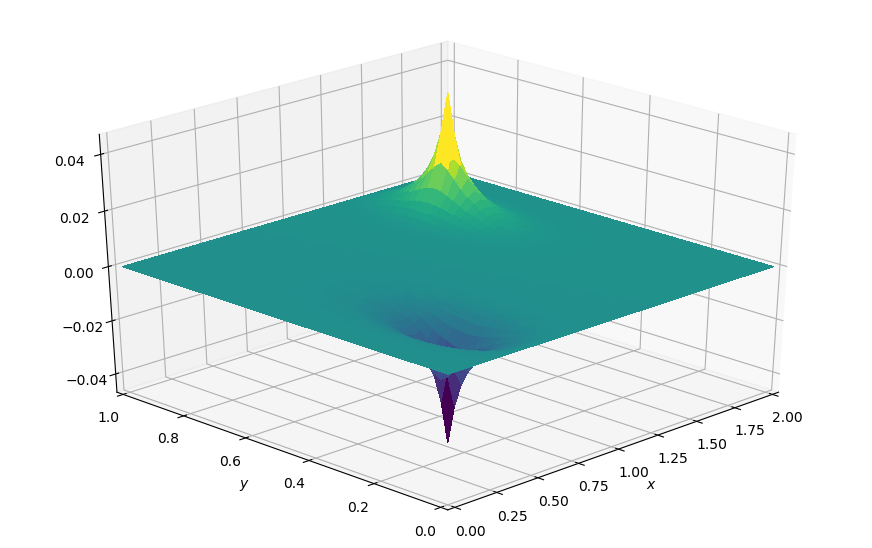

In [39]:
plot2D(x,y,p)

## Cavity Flow

$$\frac{\partial \vec v}{\partial t} + \left(\vec v \cdotp\nabla\right)\vec v = \frac{-1}{\rho}\nabla p + \nu\nabla^2\vec v$$


$$\nabla^2 p = -\rho \left(\left(\frac{\partial u}{\partial x}\right)^2 + 2\frac{\partial u}{\partial y}\frac{\partial v}{\partial x} + \left(\frac{\partial v}{\partial y}\right)^2\right) = b$$


In [40]:
nx=41
ny=41
nt=500
nit=50
dx=2/(nx-1)
dy=2/(ny-1)
x=np.linspace(0,2,nx)
y=np.linspace(0,2,ny)
X,Y = np.meshgrid(x,y)

rho = 1
nu=0.1
dt = 0.001

u=np.zeros((ny, nx))
v=np.zeros((ny, nx))
p=np.zeros((ny, nx))
b=np.zeros((ny, nx))

In [41]:
un = np.empty_like(u)
vn = np.empty_like(v)
b = np.zeros((ny, nx))

for n in range(nt):
    un = u.copy()
    vn = v.copy()
    
    b[1:-1, 1:-1] = rho/dt * ((u[1:-1, 2:] - u[1:-1, 0:-2])/(2*dx) - \
        2*((u[2:,1:-1]-u[0:-2, 1:-1])/(2*dy)*\
           (v[1:-1,2:]-v[1:-1, 0:-2])/(2*dx))-\
          ((v[2:, 1:-1] - v[0:-2, 1:-1])/(2*dy))**2)
    
    pn = np.empty_like(p)
    
    for q in range(nit):
        pn=p.copy()
        p[1:-1, 1:-1] = (((pn[1:-1, 2:] + pn[1:-1, 0:-2]) * dy**2 + 
                          (pn[2:, 1:-1] + pn[0:-2, 1:-1]) * dx**2) /
                          (2 * (dx**2 + dy**2)) -
                          dx**2 * dy**2 / (2 * (dx**2 + dy**2)) * 
                          b[1:-1,1:-1])

        p[:, -1] = p[:, -2] # dp/dx = 0 at x = 2
        p[0, :] = p[1, :]   # dp/dy = 0 at y = 0
        p[:, 0] = p[:, 1]   # dp/dx = 0 at x = 0
        p[-1, :] = 0        # p = 0 at y = 2


    u[1:-1, 1:-1] = (un[1:-1, 1:-1]-\
                     un[1:-1, 1:-1] * dt / dx *\
                    (un[1:-1, 1:-1] - un[1:-1, 0:-2]) -\
                     vn[1:-1, 1:-1] * dt / dy *\
                    (un[1:-1, 1:-1] - un[0:-2, 1:-1]) -\
                     dt / (2 * rho * dx) * (p[1:-1, 2:] - p[1:-1, 0:-2]) +\
                     nu * (dt / dx**2 *\
                    (un[1:-1, 2:] - 2 * un[1:-1, 1:-1] + un[1:-1, 0:-2]) +\
                     dt / dy**2 *\
                    (un[2:, 1:-1] - 2 * un[1:-1, 1:-1] + un[0:-2, 1:-1])))\

    v[1:-1,1:-1] = (vn[1:-1, 1:-1] -\
                    un[1:-1, 1:-1] * dt / dx *\
                   (vn[1:-1, 1:-1] - vn[1:-1, 0:-2]) -\
                    vn[1:-1, 1:-1] * dt / dy *\
                   (vn[1:-1, 1:-1] - vn[0:-2, 1:-1]) -\
                    dt / (2 * rho * dy) * (p[2:, 1:-1] - p[0:-2, 1:-1]) +\
                    nu * (dt / dx**2 *\
                   (vn[1:-1, 2:] - 2 * vn[1:-1, 1:-1] + vn[1:-1, 0:-2]) +\
                    dt / dy**2 *\
                   (vn[2:, 1:-1] - 2 * vn[1:-1, 1:-1] + vn[0:-2, 1:-1])))\

    u[0, :]  = 0
    u[:, 0]  = 0
    u[:, -1] = 0
    u[-1, :] = 1    # set velocity on cavity lid equal to 1
    v[0, :]  = 0
    v[-1, :] = 0
    v[:, 0]  = 0
    v[:, -1] = 0

C:\Users\bryce\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: RuntimeWarning: overflow encountered in multiply
  # This is added back by InteractiveShellApp.init_path()
C:\Users\bryce\Anaconda3\lib\site-packages\ipykernel_launcher.py:12: RuntimeWarning: overflow encountered in square
  if sys.path[0] == '':
C:\Users\bryce\Anaconda3\lib\site-packages\ipykernel_launcher.py:12: RuntimeWarning: invalid value encountered in subtract
  if sys.path[0] == '':
C:\Users\bryce\Anaconda3\lib\site-packages\ipykernel_launcher.py:35: RuntimeWarning: overflow encountered in multiply
C:\Users\bryce\Anaconda3\lib\site-packages\ipykernel_launcher.py:35: RuntimeWarning: invalid value encountered in subtract
C:\Users\bryce\Anaconda3\lib\site-packages\ipykernel_launcher.py:46: RuntimeWarning: overflow encountered in multiply
C:\Users\bryce\Anaconda3\lib\site-packages\ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in subtract


In [42]:
def build_b(b, rho, dt, u, v, dx, dy):
    b[1:-1, 1:-1] = rho * (1/dt * 
        ((u[1:-1, 2:] - u[1:-1, 0:-2])/(2*dx) + \
        (v[2:,1:-1] - v[0:-2, 1:-1])/(2*dy)) - \
        ((u[1:-1, 2:] - u[1:-1, 0:-2])/(2*dx))**2 - \
        2*((u[2:, 1:-1] - u[0:-2, 1:-1])/(2*dy)*\
           (v[1:-1, 2:] - v[1:-1, 0:-2])/(2*dx))-\
          ((v[2:, 1:-1] - v[0:-2, 1:-1])/(2*dy))**2)
    return b

In [43]:
def pressure_poisson(p, dx, dy, b):
    pn=np.empty_like(p)
    
    for q in range(nit):
        pn=p.copy()
        p[1:-1, 1:-1] = (((pn[1:-1, 2:] + pn[1:-1, 0:-2]) * dy**2 + 
                          (pn[2:, 1:-1] + pn[0:-2, 1:-1]) * dx**2) /
                          (2 * (dx**2 + dy**2)) -
                          dx**2 * dy**2 / (2 * (dx**2 + dy**2)) * 
                          b[1:-1,1:-1])

        p[:, -1] = p[:, -2] # dp/dx = 0 at x = 2
        p[0, :] = p[1, :]   # dp/dy = 0 at y = 0
        p[:, 0] = p[:, 1]   # dp/dx = 0 at x = 0
        p[-1, :] = 0        # p = 0 at y = 2
        
    return p

In [44]:
def cavity_flow(nt, u, v, dt, dx, dy, p, rho, nu):
    un = np.empty_like(u)
    vn = np.empty_like(v)
    b = np.zeros((ny, nx))
    
    for n in range(nt):
        un = u.copy()
        vn = v.copy()
        
        b = build_b(b, rho, dt, u, v, dx, dy)
        p = pressure_poisson(p, dx, dy, b)
        
        u[1:-1, 1:-1] = (un[1:-1, 1:-1]-
                         un[1:-1, 1:-1] * dt / dx *
                        (un[1:-1, 1:-1] - un[1:-1, 0:-2]) -
                         vn[1:-1, 1:-1] * dt / dy *
                        (un[1:-1, 1:-1] - un[0:-2, 1:-1]) -
                         dt / (2 * rho * dx) * (p[1:-1, 2:] - p[1:-1, 0:-2]) +
                         nu * (dt / dx**2 *
                        (un[1:-1, 2:] - 2 * un[1:-1, 1:-1] + un[1:-1, 0:-2]) +
                         dt / dy**2 *
                        (un[2:, 1:-1] - 2 * un[1:-1, 1:-1] + un[0:-2, 1:-1])))

        v[1:-1,1:-1] = (vn[1:-1, 1:-1] -
                        un[1:-1, 1:-1] * dt / dx *
                       (vn[1:-1, 1:-1] - vn[1:-1, 0:-2]) -
                        vn[1:-1, 1:-1] * dt / dy *
                       (vn[1:-1, 1:-1] - vn[0:-2, 1:-1]) -
                        dt / (2 * rho * dy) * (p[2:, 1:-1] - p[0:-2, 1:-1]) +
                        nu * (dt / dx**2 *
                       (vn[1:-1, 2:] - 2 * vn[1:-1, 1:-1] + vn[1:-1, 0:-2]) +
                        dt / dy**2 *
                       (vn[2:, 1:-1] - 2 * vn[1:-1, 1:-1] + vn[0:-2, 1:-1])))

        u[0, :]  = 0
        u[:, 0]  = 0
        u[:, -1] = 0
        u[-1, :] = 1    # set velocity on cavity lid equal to 1
        v[0, :]  = 0
        v[-1, :] = 0
        v[:, 0]  = 0
        v[:, -1] = 0
        
        
    return u, v, p

In [45]:
u = np.zeros((ny, nx))
v = np.zeros((ny, nx))
p = np.zeros((ny, nx))
b = np.zeros((ny, nx))
nt = 1000
u, v, p = cavity_flow(nt, u, v, dt, dx, dy, p, rho, nu)

Text(0, 0.5, 'Y')

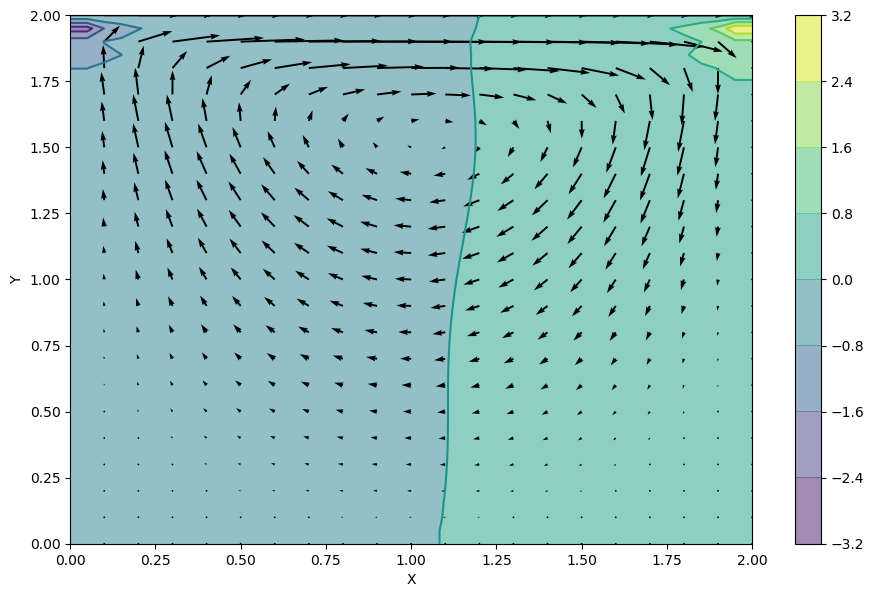

In [46]:
fig = plt.figure(figsize=(11,7), dpi=100)
# plotting the pressure field as a contour
plt.contourf(X, Y, p, alpha=0.5, cmap=cm.viridis)  
plt.colorbar()
# plotting the pressure field outlines
plt.contour(X, Y, p, cmap=cm.viridis)  
# plotting velocity field
plt.quiver(X[::2, ::2], Y[::2, ::2], u[::2, ::2], v[::2, ::2]) 
plt.xlabel('X')
plt.ylabel('Y')

Text(0, 0.5, 'y')

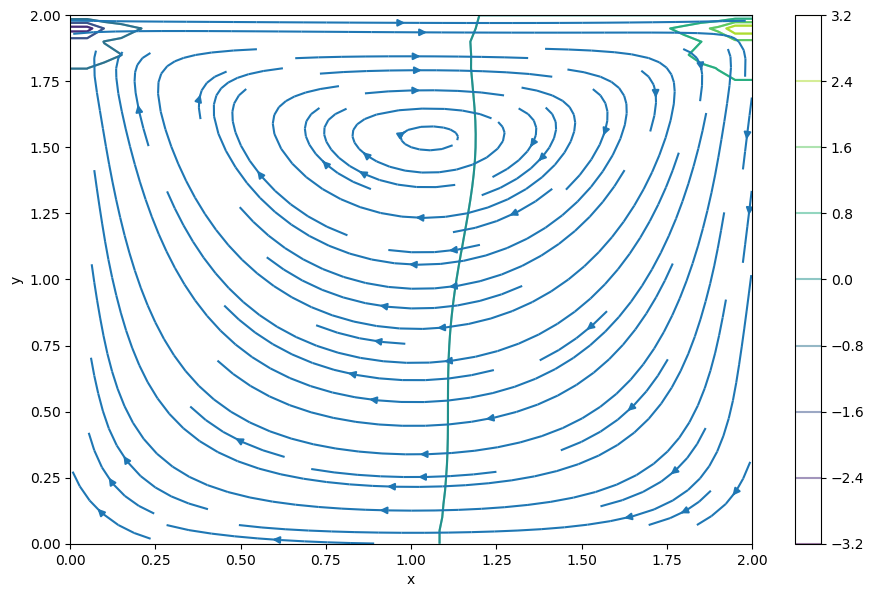

In [47]:
fig = plt.figure(figsize = (11,7), dpi = 100)
plt.contour(X,Y, p, alpha=0.5, cmap=cm.viridis)
plt.colorbar()
plt.contour(X,Y, p, cmap=cm.viridis)
plt.streamplot(X,Y,u,v)
plt.xlabel("x")
plt.ylabel("y")

## Channel Flow

$$\frac{\partial \vec v}{\partial t} + \left(\vec v \cdotp\nabla\right)\vec v = \frac{-1}{\rho}\nabla p + \nu\nabla^2\vec v + \vec F$$

$\vec F$ here is the external force on the fluid. In this case, a source term that pushes the flow to the right, meaning that the $y$ component will be zero.

$$\nabla^2 p = -\rho \left(\left(\frac{\partial u}{\partial x}\right)^2 + 2\frac{\partial u}{\partial y}\frac{\partial v}{\partial x} + \left(\frac{\partial v}{\partial y}\right)^2\right) = b$$

In [48]:
def build_b(rho, dt, dx, dy, u, v):
    b = np.zeros_like(u)
    
    b[1:-1, 1:-1] = rho*(1/dt* ((u[1:-1, 2:] - u[1:-1, 0:-2]) / (2*dx) +\
                                (v[2:, 1:-1] - v[0:-2, 1:-1]) / (2*dy)) -\
                        ((u[1:-1, 2:] - u[1:-1, 0:-2])/(2*dx))**2 -\
                        2*((u[2:, 1:-1]-u[0:-2,1:-1])/(2*dy) *\
                          (v[1:-1,2:] - v[1:-1, 0:-2])/(2*dx)) -\
                         ((v[2:,1:-1] - v[0:-2,1:-1]) / (2*dy))**2)
    
    b[1:-1, -1] = rho*(1/dt* ((u[1:-1, 0] - u[1:-1, -2]) / (2*dx)  +\
                              (v[2:, -1]  - v[0:-2, -1]) / (2*dy)) -\
                        ((u[1:-1, 0] - u[1:-1, -2])/(2*dx))**2 -\
                        2*((u[2:, -1]-u[0:-2,-1])/(2*dy) *\
                          (v[1:-1,0] - v[1:-1, -2])/(2*dx)) -\
                         ((v[2:,-1] - v[0:-2,-1]) / (2*dy))**2)
    
    b[1:-1, -0] = rho*(1/dt* ((u[1:-1, 1] - u[1:-1, -1]) / (2*dx)  +\
                              (v[2:, 0]  - v[0:-2, 0]) / (2*dy)) -\
                        ((u[1:-1, 1] - u[1:-1, -1])/(2*dx))**2 -\
                        2*((u[2:, 0]-u[0:-2,0])/(2*dy) *\
                          (v[1:-1,1] - v[1:-1, -1])/(2*dx)) -\
                         ((v[2:,0] - v[0:-2,0]) / (2*dy))**2)
    
    return b

In [49]:
def pressure_poisson_periodic(p, dx, dy):
    pn = np.empty_like(p)
    
    for q in range(nit):
        pn = p.copy()
        p[1:-1, 1:-1] = (((pn[1:-1, 2:] + pn[1:-1, 0:-2]) * dy**2 +
                          (pn[2:, 1:-1] + pn[0:-2, 1:-1]) * dx**2) /
                         (2 * (dx**2 + dy**2)) -
                         dx**2 * dy**2 / (2 * (dx**2 + dy**2)) * b[1:-1, 1:-1])

        # Periodic BC Pressure @ x = 2
        p[1:-1, -1] = (((pn[1:-1, 0] + pn[1:-1, -2])* dy**2 +
                        (pn[2:, -1] + pn[0:-2, -1]) * dx**2) /
                       (2 * (dx**2 + dy**2)) -
                       dx**2 * dy**2 / (2 * (dx**2 + dy**2)) * b[1:-1, -1])

        # Periodic BC Pressure @ x = 0
        p[1:-1, 0] = (((pn[1:-1, 1] + pn[1:-1, -1])* dy**2 +
                       (pn[2:, 0] + pn[0:-2, 0]) * dx**2) /
                      (2 * (dx**2 + dy**2)) -
                      dx**2 * dy**2 / (2 * (dx**2 + dy**2)) * b[1:-1, 0])
        
        # Wall boundary conditions, pressure
        p[-1, :]= p[-2, :]  # dp/dy = 0 at y = 2
        p[0, :] = p[1, :]  # dp/dy = 0 at y = 0
    
    return p

In [50]:
##variable declarations
nx = 41
ny = 41
nt = 10
nit = 50 
c = 1
dx = 2 / (nx - 1)
dy = 2 / (ny - 1)
x = np.linspace(0, 2, nx)
y = np.linspace(0, 2, ny)
X, Y = np.meshgrid(x, y)


##physical variables
rho = 1
nu = .1
F = 1
dt = .01

#initial conditions
u = np.zeros((ny, nx))
un = np.zeros((ny, nx))

v = np.zeros((ny, nx))
vn = np.zeros((ny, nx))

p = np.ones((ny, nx))
pn = np.ones((ny, nx))

b = np.zeros((ny, nx))

In [51]:
udiff = 1
stepcount = 0

while udiff > .001:
    un = u.copy()
    vn = v.copy()

    b = build_b(rho, dt, dx, dy, u, v)
    p = pressure_poisson_periodic(p, dx, dy)

    u[1:-1, 1:-1] = (un[1:-1, 1:-1] -
                     un[1:-1, 1:-1] * dt / dx * 
                    (un[1:-1, 1:-1] - un[1:-1, 0:-2]) -
                     vn[1:-1, 1:-1] * dt / dy * 
                    (un[1:-1, 1:-1] - un[0:-2, 1:-1]) -
                     dt / (2 * rho * dx) * 
                    (p[1:-1, 2:] - p[1:-1, 0:-2]) +
                     nu * (dt / dx**2 * 
                    (un[1:-1, 2:] - 2 * un[1:-1, 1:-1] + un[1:-1, 0:-2]) +
                     dt / dy**2 * 
                    (un[2:, 1:-1] - 2 * un[1:-1, 1:-1] + un[0:-2, 1:-1])) + 
                     F * dt)

    v[1:-1, 1:-1] = (vn[1:-1, 1:-1] -
                     un[1:-1, 1:-1] * dt / dx * 
                    (vn[1:-1, 1:-1] - vn[1:-1, 0:-2]) -
                     vn[1:-1, 1:-1] * dt / dy * 
                    (vn[1:-1, 1:-1] - vn[0:-2, 1:-1]) -
                     dt / (2 * rho * dy) * 
                    (p[2:, 1:-1] - p[0:-2, 1:-1]) +
                     nu * (dt / dx**2 *
                    (vn[1:-1, 2:] - 2 * vn[1:-1, 1:-1] + vn[1:-1, 0:-2]) +
                     dt / dy**2 * 
                    (vn[2:, 1:-1] - 2 * vn[1:-1, 1:-1] + vn[0:-2, 1:-1])))

    # Periodic BC u @ x = 2     
    u[1:-1, -1] = (un[1:-1, -1] - un[1:-1, -1] * dt / dx * 
                  (un[1:-1, -1] - un[1:-1, -2]) -
                   vn[1:-1, -1] * dt / dy * 
                  (un[1:-1, -1] - un[0:-2, -1]) -
                   dt / (2 * rho * dx) *
                  (p[1:-1, 0] - p[1:-1, -2]) + 
                   nu * (dt / dx**2 * 
                  (un[1:-1, 0] - 2 * un[1:-1,-1] + un[1:-1, -2]) +
                   dt / dy**2 * 
                  (un[2:, -1] - 2 * un[1:-1, -1] + un[0:-2, -1])) + F * dt)

    # Periodic BC u @ x = 0
    u[1:-1, 0] = (un[1:-1, 0] - un[1:-1, 0] * dt / dx *
                 (un[1:-1, 0] - un[1:-1, -1]) -
                  vn[1:-1, 0] * dt / dy * 
                 (un[1:-1, 0] - un[0:-2, 0]) - 
                  dt / (2 * rho * dx) * 
                 (p[1:-1, 1] - p[1:-1, -1]) + 
                  nu * (dt / dx**2 * 
                 (un[1:-1, 1] - 2 * un[1:-1, 0] + un[1:-1, -1]) +
                  dt / dy**2 *
                 (un[2:, 0] - 2 * un[1:-1, 0] + un[0:-2, 0])) + F * dt)

    # Periodic BC v @ x = 2
    v[1:-1, -1] = (vn[1:-1, -1] - un[1:-1, -1] * dt / dx *
                  (vn[1:-1, -1] - vn[1:-1, -2]) - 
                   vn[1:-1, -1] * dt / dy *
                  (vn[1:-1, -1] - vn[0:-2, -1]) -
                   dt / (2 * rho * dy) * 
                  (p[2:, -1] - p[0:-2, -1]) +
                   nu * (dt / dx**2 *
                  (vn[1:-1, 0] - 2 * vn[1:-1, -1] + vn[1:-1, -2]) +
                   dt / dy**2 *
                  (vn[2:, -1] - 2 * vn[1:-1, -1] + vn[0:-2, -1])))

    # Periodic BC v @ x = 0
    v[1:-1, 0] = (vn[1:-1, 0] - un[1:-1, 0] * dt / dx *
                 (vn[1:-1, 0] - vn[1:-1, -1]) -
                  vn[1:-1, 0] * dt / dy *
                 (vn[1:-1, 0] - vn[0:-2, 0]) -
                  dt / (2 * rho * dy) * 
                 (p[2:, 0] - p[0:-2, 0]) +
                  nu * (dt / dx**2 * 
                 (vn[1:-1, 1] - 2 * vn[1:-1, 0] + vn[1:-1, -1]) +
                  dt / dy**2 * 
                 (vn[2:, 0] - 2 * vn[1:-1, 0] + vn[0:-2, 0])))


    # Wall BC: u,v = 0 @ y = 0,2
    u[0, :] = 0
    u[-1, :] = 0
    v[0, :] = 0
    v[-1, :]=0
    
    udiff = (np.sum(u) - np.sum(un)) / np.sum(u)
    stepcount += 1

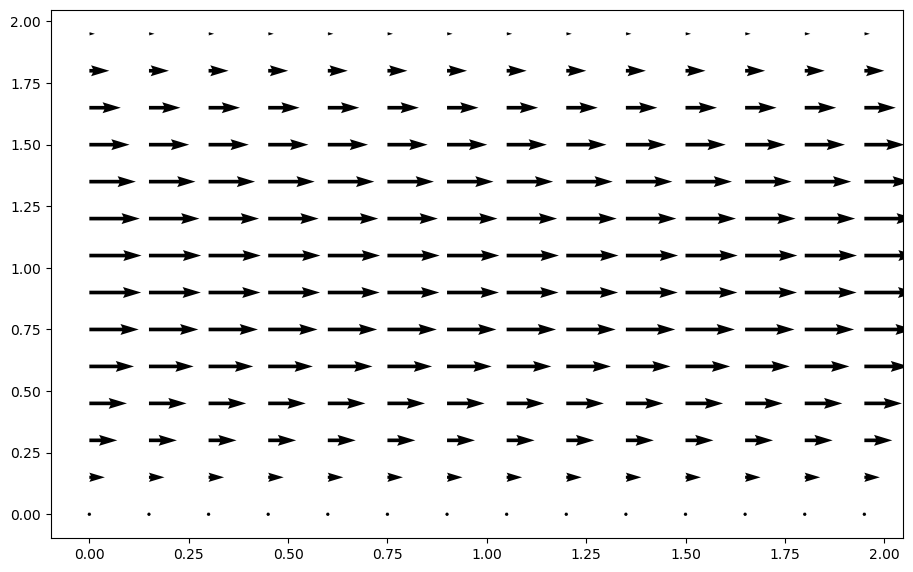

In [52]:
fig = plt.figure(figsize = (11,7), dpi=100)
plt.quiver(X[::3, ::3], Y[::3, ::3], u[::3, ::3], v[::3, ::3]);

# 3D

## linear convection
$$\frac{\partial \vec v}{\partial t} + \left(\vec c \cdotp\nabla\right)\vec v =0$$

0.025 0.20000000000000004 4.999999999999999


Text(0.5, 0, '$z$')

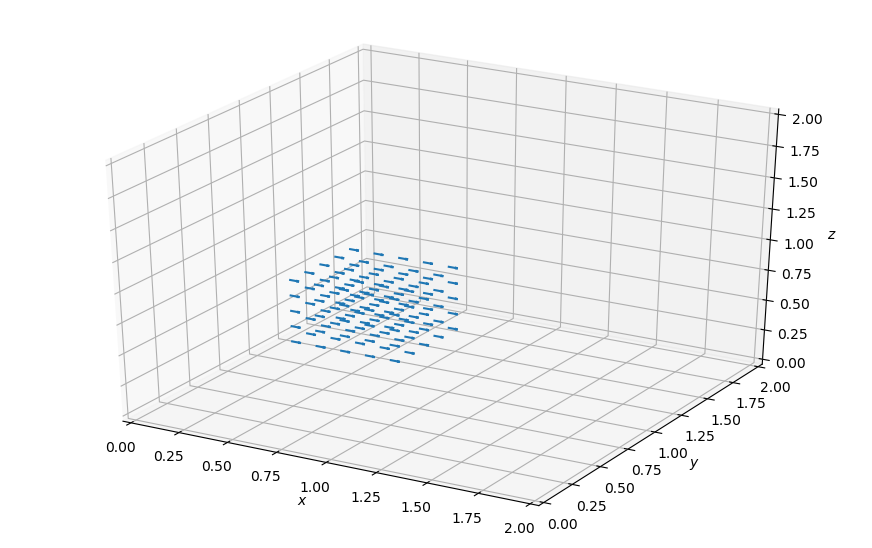

In [53]:
import numpy as np
import matplotlib.pyplot as plt
nx = 81
ny = 81
nz = 81
nt = 100
c = 1
dx = 2/(nx-1)
dy = 2/(ny-1)
dz = 2/(nz-1)
sigma = .2 # what is this?
dt = sigma*dx
print(dx, dt/dx, dx/dt)

x = np.linspace(0,2, nx)
y = np.linspace(0,2, ny)
z = np.linspace(0,2, nz)

u = np.zeros((nx, ny, nz))
un = np.zeros((nx, ny, nz))
u[int(0.5/dx):int(1/dx+1), int(0.5/dy):int(1/dy+1), int(0.5/dz):int(1/dz+1)] = 1

v = np.zeros((nx, ny, nz))
vn = np.zeros((nx, ny, nz))
#v[int(0.5/dx):int(1/dx+1), int(0.5/dy):int(1/dy+1), int(0.5/dz):int(1/dz+1)] = 1

w = np.zeros((nx, ny, nz))
wn = np.zeros((nx, ny, nz))
#w[int(0.5/dx):int(1/dx+1), int(0.5/dy):int(1/dy+1), int(0.5/dz):int(1/dz+1)] = 1

fig = plt.figure(figsize=(11,7), dpi=100)
ax = fig.gca(projection="3d")
ax.set_xlim(0,2)
ax.set_ylim(0,2)
ax.set_zlim(0,2)
X,Y,Z = np.meshgrid(x,y,z)
field = ax.quiver(X[::5, ::5, ::5], Y[::5, ::5, ::5], Z[::5, ::5, ::5], u[::5,::5,::5], v[::5,::5,::5], w[::5,::5,::5], length=0.05, cmap=cm.viridis)

ax.set_xlabel("$x$")
ax.set_ylabel("$y$")
ax.set_zlabel("$z$")

In [54]:
print(dx, 0.5/dx, 1/dx+1)

0.025 20.0 41.0


why is this travelling forward and vertically? forward makes sense, but not vertical movement

Text(0.5, 0, '$z$')

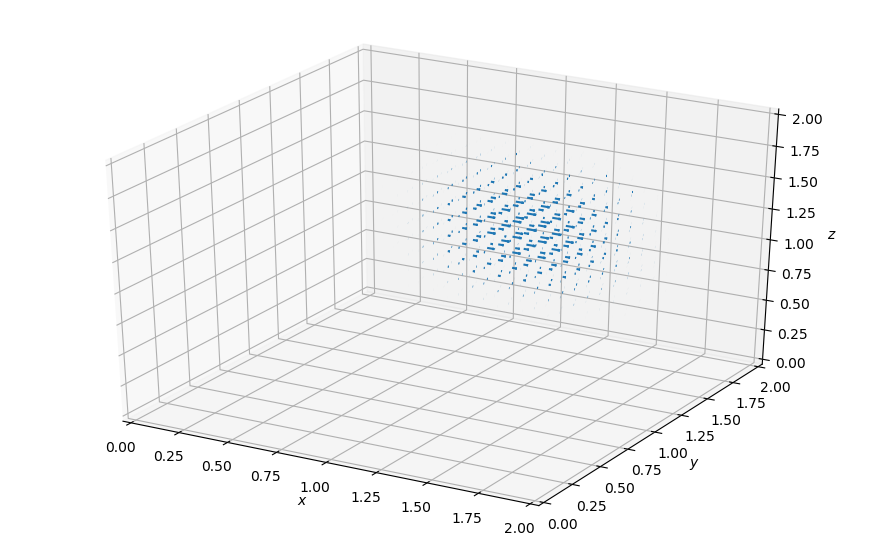

In [55]:
for n in range(nt + 1):
    un=u.copy()
    vn=v.copy()
    wn=w.copy()
    
    u[1:,1:,1:] = (un[1:, 1:, 1:] - \
                c*dt/dx*(un[1:, 1:, 1:] - un[:-1, 1:, 1:]) - \
                c*dt/dy*(un[1:, 1:, 1:] - un[1:, :-1, 1:]) - \
                c*dt/dz*(un[1:, 1:, 1:] - un[1:, 1:, :-1]))
    v[1:,1:,1:] = (vn[1:, 1:, 1:] - \
                c*dt/dx*(vn[1:, 1:, 1:] - vn[:-1, 1:, 1:]) - \
                c*dt/dy*(vn[1:, 1:, 1:] - vn[1:, :-1, 1:]) - \
                c*dt/dz*(vn[1:, 1:, 1:] - vn[1:, 1:, :-1]))
    w[1:,1:,1:] = (wn[1:, 1:, 1:] - \
                c*dt/dx*(wn[1:, 1:, 1:] - wn[:-1, 1:, 1:]) - \
                c*dt/dy*(wn[1:, 1:, 1:] - wn[1:, :-1, 1:]) - \
                c*dt/dz*(wn[1:, 1:, 1:] - wn[1:, 1:, :-1]))
    
    u[0,:, :]   = 0 # sets boundary conditions
    u[-1, :, :] = 0
    u[:,0, :]   = 0
    u[:, -1, :] = 0
    u[:,:, 0]   = 0
    u[:, :, -1] = 0
    
    v[0,:, :]   = 0 # sets boundary conditions
    v[-1, :, :] = 0
    v[:,0, :]   = 0
    v[:, -1, :] = 0
    v[:,:, 0]   = 0
    v[:, :, -1] = 0
    
    w[0,:, :]   = 0 # sets boundary conditions
    w[-1, :, :] = 0
    w[:,0, :]   = 0
    w[:, -1, :] = 0
    w[:,:, 0]   = 0
    w[:, :, -1] = 0
    
fig = plt.figure(figsize=(11,7), dpi=100)
ax=fig.gca(projection="3d")
ax.set_xlim(0,2)
ax.set_ylim(0,2)
ax.set_zlim(0,2)
field2 = ax.quiver(X[::5, ::5, ::5], Y[::5, ::5, ::5], Z[::5, ::5, ::5], u[::5,::5,::5], v[::5,::5,::5], w[::5,::5,::5], length=0.05, cmap=cm.viridis)

ax.set_xlabel("$x$")
ax.set_ylabel("$y$")
ax.set_zlabel("$z$")

## Nonlinear Convection

0.025 0.20000000000000004 4.999999999999999


Text(0.5, 0, '$z$')

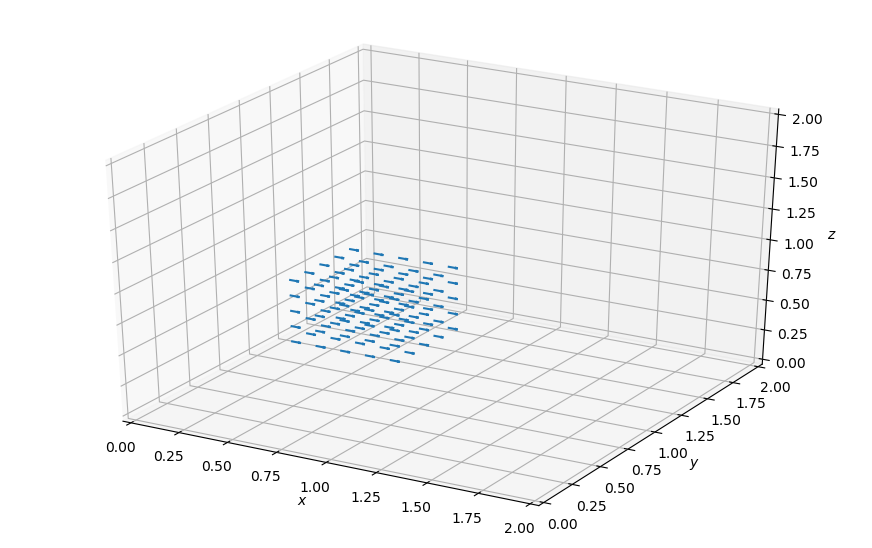

In [56]:
import numpy as np
import matplotlib.pyplot as plt
nx = 81
ny = 81
nz = 81
nt = 100
c = 1
dx = 2/(nx-1)
dy = 2/(ny-1)
dz = 2/(nz-1)
sigma = .2 # what is this?
dt = sigma*dx
print(dx, dt/dx, dx/dt)

x = np.linspace(0,2, nx)
y = np.linspace(0,2, ny)
z = np.linspace(0,2, nz)

u = np.zeros((nx, ny, nz))
un = np.zeros((nx, ny, nz))
u[int(0.5/dx):int(1/dx+1), int(0.5/dy):int(1/dy+1), int(0.5/dz):int(1/dz+1)] = 1

v = np.zeros((nx, ny, nz))
vn = np.zeros((nx, ny, nz))
#v[int(0.5/dx):int(1/dx+1), int(0.5/dy):int(1/dy+1), int(0.5/dz):int(1/dz+1)] = 1

w = np.zeros((nx, ny, nz))
wn = np.zeros((nx, ny, nz))
#w[int(0.5/dx):int(1/dx+1), int(0.5/dy):int(1/dy+1), int(0.5/dz):int(1/dz+1)] = 1

fig = plt.figure(figsize=(11,7), dpi=100)
ax = fig.gca(projection="3d")
ax.set_xlim(0,2)
ax.set_ylim(0,2)
ax.set_zlim(0,2)
X,Y,Z = np.meshgrid(x,y,z)
field = ax.quiver(X[::5, ::5, ::5], Y[::5, ::5, ::5], Z[::5, ::5, ::5], u[::5,::5,::5], v[::5,::5,::5], w[::5,::5,::5], length=0.05, cmap=cm.viridis)

ax.set_xlabel("$x$")
ax.set_ylabel("$y$")
ax.set_zlabel("$z$")

unsure if this has moved at all, just seems to have diminished...

Text(0.5, 0, '$z$')

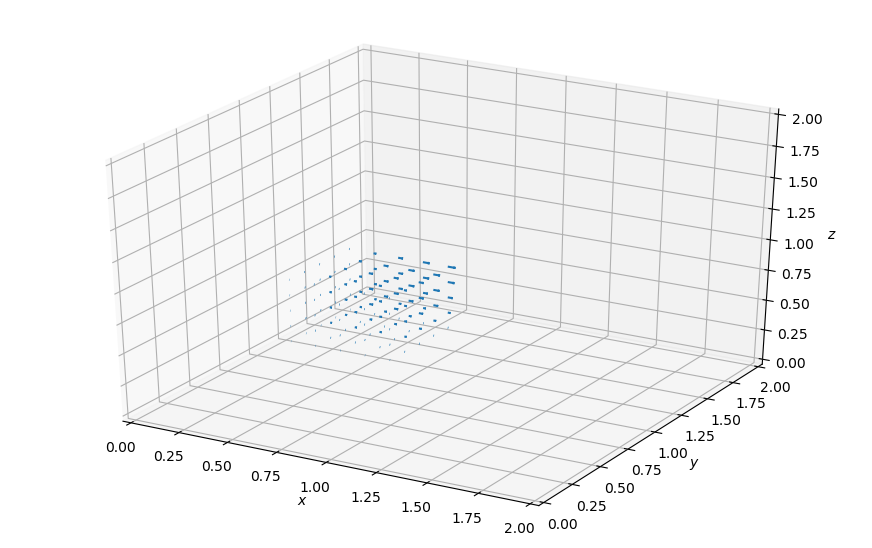

In [57]:
for n in range(nt + 1):
    un=u.copy()
    vn=v.copy()
    wn=w.copy()
    
    u[1:,1:,1:] = (un[1:, 1:, 1:] - \
                un[1:, 1:, 1:]*dt/dx*(un[1:, 1:, 1:] - un[:-1, 1:, 1:]) - \
                un[1:, 1:, 1:]*dt/dy*(un[1:, 1:, 1:] - un[1:, :-1, 1:]) - \
                un[1:, 1:, 1:]*dt/dz*(un[1:, 1:, 1:] - un[1:, 1:, :-1]))
    v[1:,1:,1:] = (vn[1:, 1:, 1:] - \
                vn[1:, 1:, 1:]*dt/dx*(vn[1:, 1:, 1:] - vn[:-1, 1:, 1:]) - \
                vn[1:, 1:, 1:]*dt/dy*(vn[1:, 1:, 1:] - vn[1:, :-1, 1:]) - \
                vn[1:, 1:, 1:]*dt/dz*(vn[1:, 1:, 1:] - vn[1:, 1:, :-1]))
    w[1:,1:,1:] = (wn[1:, 1:, 1:] - \
                wn[1:, 1:, 1:]*dt/dx*(wn[1:, 1:, 1:] - wn[:-1, 1:, 1:]) - \
                wn[1:, 1:, 1:]*dt/dy*(wn[1:, 1:, 1:] - wn[1:, :-1, 1:]) - \
                wn[1:, 1:, 1:]*dt/dz*(wn[1:, 1:, 1:] - wn[1:, 1:, :-1]))
    
    u[0,:, :]   = 0 # sets boundary conditions
    u[-1, :, :] = 0
    u[:,0, :]   = 0
    u[:, -1, :] = 0
    u[:,:, 0]   = 0
    u[:, :, -1] = 0
    
    v[0,:, :]   = 0 # sets boundary conditions
    v[-1, :, :] = 0
    v[:,0, :]   = 0
    v[:, -1, :] = 0
    v[:,:, 0]   = 0
    v[:, :, -1] = 0
    
    w[0,:, :]   = 0 # sets boundary conditions
    w[-1, :, :] = 0
    w[:,0, :]   = 0
    w[:, -1, :] = 0
    w[:,:, 0]   = 0
    w[:, :, -1] = 0
    
fig = plt.figure(figsize=(11,7), dpi=100)
ax=fig.gca(projection="3d")
ax.set_xlim(0,2)
ax.set_ylim(0,2)
ax.set_zlim(0,2)
field2 = ax.quiver(X[::5, ::5, ::5], Y[::5, ::5, ::5], Z[::5, ::5, ::5], u[::5,::5,::5], v[::5,::5,::5], w[::5,::5,::5], length=0.05, cmap=cm.viridis)

ax.set_xlabel("$x$")
ax.set_ylabel("$y$")
ax.set_zlabel("$z$")

## Diffusion
$$\frac{\partial \vec u}{\partial t} = \nu \nabla^2 \vec u = \nu\frac{\partial^2 \vec u}{\partial x^2} + \nu\frac{\partial^2 \vec u}{\partial y^2} + \nu\frac{\partial^2 \vec u}{\partial z^2}$$

$$\frac{\partial u}{\partial t} = \nu\frac{\partial^2 u}{\partial x^2} + \nu\frac{\partial^2 u}{\partial y^2} + \nu\frac{\partial^2 u}{\partial z^2}$$
$$\frac{\partial v}{\partial t} = \nu\frac{\partial^2 v}{\partial x^2} + \nu\frac{\partial^2 v}{\partial y^2} + \nu\frac{\partial^2 v}{\partial z^2}$$
$$\frac{\partial w}{\partial t} = \nu\frac{\partial^2 w}{\partial x^2} + \nu\frac{\partial^2 w}{\partial y^2} + \nu\frac{\partial^2 w}{\partial z^2}$$

0.025 0.05000000000000001 19.999999999999996


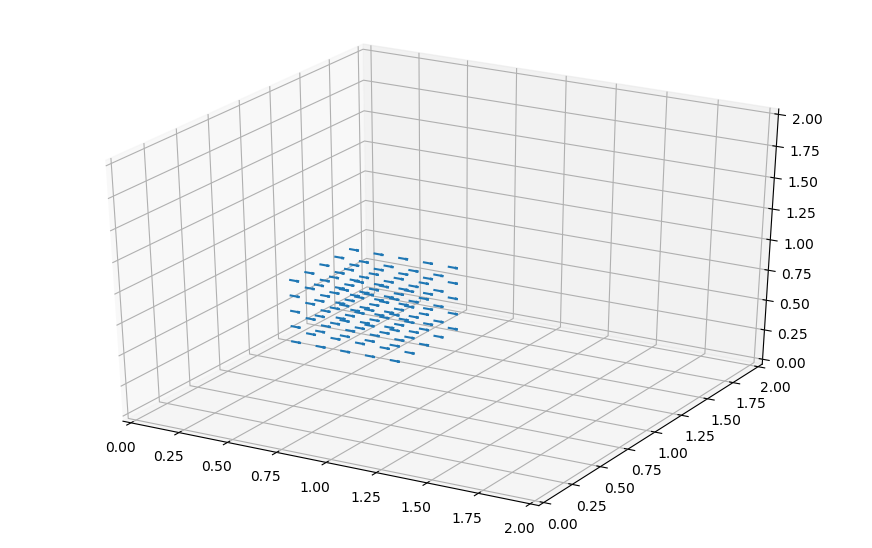

In [93]:
import numpy as np
import matplotlib.pyplot as plt
nx = 81
ny = 81
nz = 81
nt = 10
c = 1
dx = 2/(nx-1)
dy = 2/(ny-1)
dz = 2/(nz-1)
sigma = .2 # what is this?
dt = sigma*dx*dy/nu
print(dx, dt/dx, dx/dt)

x = np.linspace(0,2, nx)
y = np.linspace(0,2, ny)
z = np.linspace(0,2, nz)

u = np.zeros((nx, ny, nz))
un = np.zeros((nx, ny, nz))
u[int(0.5/dx):int(1/dx+1), int(0.5/dy):int(1/dy+1), int(0.5/dz):int(1/dz+1)] = 1

v = np.zeros((nx, ny, nz))
vn = np.zeros((nx, ny, nz))
#v[int(0.5/dx):int(1/dx+1), int(0.5/dy):int(1/dy+1), int(0.5/dz):int(1/dz+1)] = 1

w = np.zeros((nx, ny, nz))
wn = np.zeros((nx, ny, nz))
#w[int(0.5/dx):int(1/dx+1), int(0.5/dy):int(1/dy+1), int(0.5/dz):int(1/dz+1)] = 1

fig = plt.figure(figsize=(11,7), dpi=100)
ax = fig.gca(projection="3d")
X,Y,Z = np.meshgrid(x,y,z)
ax.set_xlim(0,2)
ax.set_ylim(0,2)
ax.set_zlim(0,2)
field2 = ax.quiver(X[::5, ::5, ::5], Y[::5, ::5, ::5], Z[::5, ::5, ::5], u[::5,::5,::5], v[::5,::5,::5], w[::5,::5,::5], length=0.05, cmap=cm.viridis)

ax.set_xlabel("$x$")
ax.set_ylabel("$y$")
ax.set_zlabel("$z$")

Text(0.5, 0, '$z$')

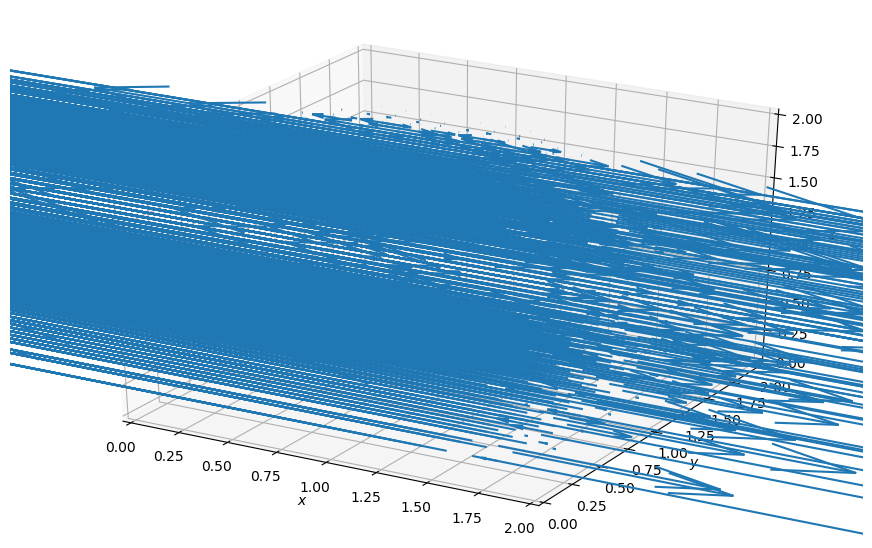

In [95]:
u = np.zeros((nx, ny, nz))
u[int(0.5/dx):int(1/dx+1), int(0.5/dy):int(1/dy+1), int(0.5/dz):int(1/dz+1)] = 1

for n in range(nt + 1):
    un=u.copy()
    vn=v.copy()
    wn=w.copy()

    u[1:-1, 1:-1, 1:-1] = un[1:-1, 1:-1, 1:-1] + \
        nu*dt/(dx)**2 * (un[2:, 1:-1, 1:-1] - 2*un[1:-1, 1:-1, 1:-1] + un[0:-2, 1:-1, 1:-1]) + \
        nu*dt/(dy)**2 * (un[1:-1, 2:, 1:-1] - 2*un[1:-1, 1:-1, 1:-1] + un[1:-1, 0:-2, 1:-1]) + \
        nu*dt/(dz)**2 * (un[1:-1, 1:-1, 2:] - 2*un[1:-1, 1:-1, 1:-1] + un[1:-1, 1:-1, 0:-2])

    v[1:-1, 1:-1, 1:-1] = vn[1:-1, 1:-1, 1:-1] + \
        nu*dt/(dx)**2 * (vn[2:, 1:-1, 1:-1] - 2*vn[1:-1, 1:-1, 1:-1] + vn[0:-2, 1:-1, 1:-1]) + \
        nu*dt/(dy)**2 * (vn[1:-1, 2:, 1:-1] - 2*vn[1:-1, 1:-1, 1:-1] + vn[1:-1, 0:-2, 1:-1]) + \
        nu*dt/(dz)**2 * (vn[1:-1, 1:-1, 2:] - 2*vn[1:-1, 1:-1, 1:-1] + vn[1:-1, 1:-1, 0:-2])
    
    w[1:-1, 1:-1, 1:-1] = wn[1:-1, 1:-1, 1:-1] + \
        nu*dt/(dx)**2 * (wn[2:, 1:-1, 1:-1] - 2*wn[1:-1, 1:-1, 1:-1] + wn[0:-2, 1:-1, 1:-1]) + \
        nu*dt/(dy)**2 * (wn[1:-1, 2:, 1:-1] - 2*wn[1:-1, 1:-1, 1:-1] + wn[1:-1, 0:-2, 1:-1]) + \
        nu*dt/(dz)**2 * (wn[1:-1, 1:-1, 2:] - 2*wn[1:-1, 1:-1, 1:-1] + wn[1:-1, 1:-1, 0:-2])
    
    print(np.max(u))
    print(np.min(u))

fig = plt.figure(figsize=(11,7), dpi = 100)
ax = fig.gca(projection="3d")
ax.set_xlim(0,2)
ax.set_ylim(0,2)
ax.set_zlim(0,2)
field2 = ax.quiver(X[::5, ::5, ::5], Y[::5, ::5, ::5], Z[::5, ::5, ::5], u[::5,::5,::5], v[::5,::5,::5], w[::5,::5,::5], length=0.05, cmap=cm.viridis)

ax.set_xlabel("$x$")
ax.set_ylabel("$y$")
ax.set_zlabel("$z$")

In [98]:
print(max(u))

ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

## Burger's Equation
$$\frac{\partial \vec v}{\partial t} + \left(\vec v \cdotp\nabla\right)\vec v = \frac{-1}{\rho}\nabla p + \nu\nabla^2\vec v + \vec F$$

$$\nabla^2 p = -\rho \left(\left(\frac{\partial u}{\partial x}\right)^2 + 2\frac{\partial u}{\partial y}\frac{\partial v}{\partial x} + \left(\frac{\partial v}{\partial y}\right)^2\right) = b$$